# Feature Engineering

### Loading Bondora Preprocessed Data
- Steps after EDA

In [1]:
#importing libararies
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Loadig preprocessed data
df = pd.read_csv('prepro.csv')

In [6]:
pd.set_option('display.max_columns',None)
df.head()

,BidsPortfolioManager,BidsApi,BidsManual,NewCreditCustomer,VerificationType,LanguageCode,Age,Gender,Country,AppliedAmount,Amount,Interest,LoanDuration,MonthlyPayment,County,City,UseOfLoan,Education,MaritalStatus,EmploymentStatus,EmploymentDurationCurrentEmployer,OccupationArea,HomeOwnershipType,IncomeTotal,ExistingLiabilities,LiabilitiesTotal,RefinanceLiabilities,DebtToIncome,FreeCash,MonthlyPaymentDay,DefaultDate,Rating,Restructured,CreditScoreEsMicroL,PrincipalPaymentsMade,InterestAndPenaltyPaymentsMade,PrincipalBalance,InterestAndPenaltyBalance,NoOfPreviousLoansBeforeLoan,AmountOfPreviousLoansBeforeLoan,PreviousRepaymentsBeforeLoan,PreviousEarlyRepaymentsCountBeforeLoan
0,1355,0,645.0,Yes,Income verified,Finnish,28,Male,FI,2000.0,2000.0,24.46,60,63.90,POHJOIS-SAVO,KUOPIO,Other,Higher,Cohabitant,FullyEmployed,UpTo2Years,Construction,1.0,2097.0,1,629.00,0,3.05,1404.10,15,0,D,Yes,NaN,1387.57,1845.64,612.43,0.0,0,0.0,0.00,0
1,1000,0,0.0,No,Income and expenses verified,Estonian,27,Male,EE,1000.0,1000.0,17.74,60,28.17,LÄÄNE-VIRUMAA,SÕMERU VALD,Other,Secondary,Single,FullyEmployed,UpTo1Year,Other,6.0,560.0,8,1327.37,2,47.56,43.67,6,0,B,Yes,NaN,608.05,638.67,391.95,0.0,1,1300.0,187.87,0
2,2345,0,655.0,No,Income verified,Estonian,29,Male,EE,3000.0,3000.0,17.87,60,84.72,PÄRNUMAA,PÄRNU,Other,Basic,Single,FullyEmployed,UpTo3Years,Processing,3.0,745.0,4,427.03,0,27.48,290.28,14,0,B,Yes,NaN,1270.42,1890.24,1729.58,0.0,1,1000.0,623.89,0
3,2045,0,955.0,Yes,Income verified,Finnish,25,Male,FI,3000.0,3000.0,27.98,60,102.12,POHJOIS-SAVO,KUOPIO,LoanConsolidation,Vocational,Single,FullyEmployed,UpTo5Years,Telecom,4.0,1530.0,4,955.00,0,36.41,472.88,27,0,D,Yes,NaN,1916.72,3144.21,1083.28,0.0,0,0.0,0.00,0
4,1500,0,0.0,Yes,Income unverified,Estonian,30,Male,EE,1500.0,1500.0,29.25,60,52.84,TARTU,KABINA,Other,Secondary,Cohabitant,Entrepreneur,MoreThan5Years,Utilities,3.0,1500.0,2,465.00,0,4.52,982.16,25,0,D,No,NaN,1453.11,1396.06,46.89,0.0,0,0.0,0.00,0


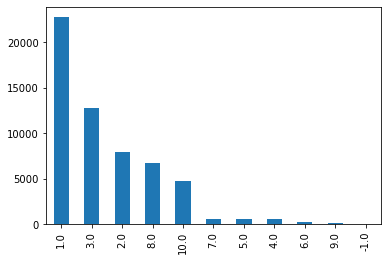

In [7]:
# checking distribution of HomeOwnershipType
df['HomeOwnershipType'].value_counts().plot(kind='bar')
plt.show()

In [9]:
df['HomeOwnershipType'].replace([-1,0,1,2,3,4,5,6,7,8,10],['Not_specified', 'Homeless', 'Owner', 'Livingwithparents', 'Tenant,pre-furnishedproperty', 'Tenant,unfurnishedproperty',' Councilhouse','Jointtenant','Joint ownership','Mortgage','Other'], inplace=True)

In [11]:
#available missing values in the dataset
df.isnull().sum()

BidsPortfolioManager                          0
BidsApi                                       0
BidsManual                                    0
NewCreditCustomer                             0
VerificationType                              0
LanguageCode                                  0
Age                                           0
Gender                                        0
Country                                       0
AppliedAmount                                 0
Amount                                        0
Interest                                      0
LoanDuration                                  0
MonthlyPayment                               58
County                                    16325
City                                       4750
UseOfLoan                                     0
Education                                     0
MaritalStatus                                 0
EmploymentStatus                              0
EmploymentDurationCurrentEmployer       

In [12]:
df.County.unique()

array(['POHJOIS-SAVO', 'LÄÄNE-VIRUMAA', 'PÄRNUMAA', 'TARTU',
       'CASTILLA Y LEÓN', 'KUOPIO', 'BARCELONA', 'HARJU',
       'ETELÄ-POHJANMAA', 'SAARE', 'VASARAINEN', 'KYMENLAAKSO',
       'PIRKANMAA', 'POHJANMAA', 'JÕGEVAMAA', 'VILJANDI', 'JÕGEVA',
       'MADRID', 'ETELÄ-KARJALA', 'RAPLA', 'PÕLVAMAA', 'UUSIMAA',
       'TARUMAA', 'VALGA', 'JÄRVAMAA', 'VÕRUMAA', 'KIRKKONUMMI',
       'IDA-VIRU', nan, 'UUDENMAAN', 'PÄRNU LINN', 'GALICIA',
       'KESKI-SUOMI', 'COMUNIDAD DE MADRID', 'ESPOO', 'POHJOIS-SAVON',
       'CASTILLA-LA MANCHA', 'UUDIMAA', 'KANTA-HÄME', 'VANTAA',
       'POHJOIS-POHJANMAAN', 'PÄRNU MAAKOND', 'JÕGEVA MAAKOND',
       'VARSINAIS-SUOMI', 'LAS PALMAS', 'COMUNIDAD VALENCIANA',
       'PÄIJÄT-HÄMEEN MAAKUNTA', 'LÄNSI-SUOMI', 'LÄÄNE MAAKOND', 'OULU',
       'ETELÄ-SUOMI', 'LÄÄNE-VIRU MAAKOND', 'JÄRVA', 'SAARE MAAKOND',
       'JÄRVA MAAKOND', 'SATAKUNTA', 'CANTABRIA', 'SEINÄJOKI',
       'CIUDAD REAL', 'LAPPEENRANTA', 'VARSINAIS SUOMI', 'VÕRU MAAKOND',
       'ETELÄ-

In [13]:
df.City.unique()

array(['KUOPIO', 'SÕMERU VALD', 'PÄRNU', ..., 'KEHTNA VALD RAPLA MAAKOND',
       'MÕNISTE VALD, SARU KÜLA', 'KÕO'], dtype=object)

In [14]:
# county and city are having too many categories
df.drop(labels = ['County', 'City'], axis = 1, inplace = True)

In [15]:
# dropping redundant variables 
df.drop(labels = ['NoOfPreviousLoansBeforeLoan','PreviousRepaymentsBeforeLoan','LanguageCode'],axis = 1, inplace = True)

In [17]:
# dropping invalid vars (i.e. the information we don't know at the time the loan is requested)
# also we already have LoanPeriod, so there no need for other dates
df.drop(labels = ['InterestAndPenaltyPaymentsMade','InterestAndPenaltyBalance', 'PrincipalBalance', 'PrincipalPaymentsMade'], axis = 1, inplace = True)

In [18]:
df.fillna(value = {'CreditScoreEsMicroL': 'Other','Rating': 'Other','HomeOwnershipType': 'Not_specified',
                   'EmploymentDurationCurrentEmployer': 'Other','EmploymentStatus': 'Not_defined',
                   'OccupationArea': 'Not_mentioned','Education': 'Not_set','Gender': 'Undefined',
                   'MaritalStatus': 'Not_present'}, axis = 0, inplace = True)

In [19]:
#checking number of categories per categorical variable
cat_vars = df.columns[df.dtypes == 'object']
for i, c in enumerate(cat_vars):
    print(cat_vars[i], len(df[c].unique()))

NewCreditCustomer 2
VerificationType 4
Gender 3
Country 4
UseOfLoan 10
Education 6
MaritalStatus 6
EmploymentStatus 6
EmploymentDurationCurrentEmployer 9
OccupationArea 20
HomeOwnershipType 11
Rating 9
Restructured 2
CreditScoreEsMicroL 9


<AxesSubplot:>

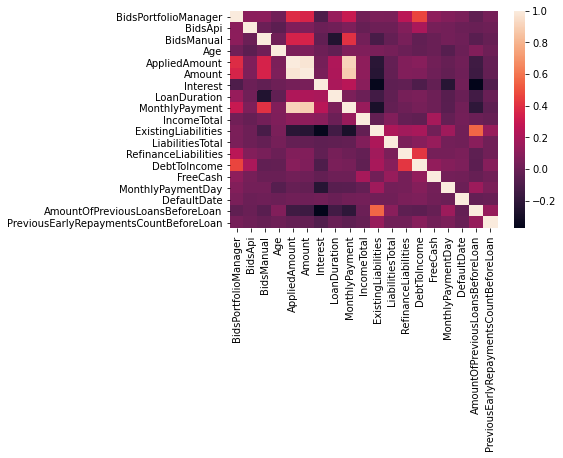

In [20]:
#checking correlation between numerical variables
temp = df.copy()
numerical = temp.columns[df.dtypes != 'object']
num_vars = temp[numerical]
sns.heatmap(num_vars.corr())

In [21]:
plt.rcParams['figure.dpi'] = 300

<AxesSubplot:>

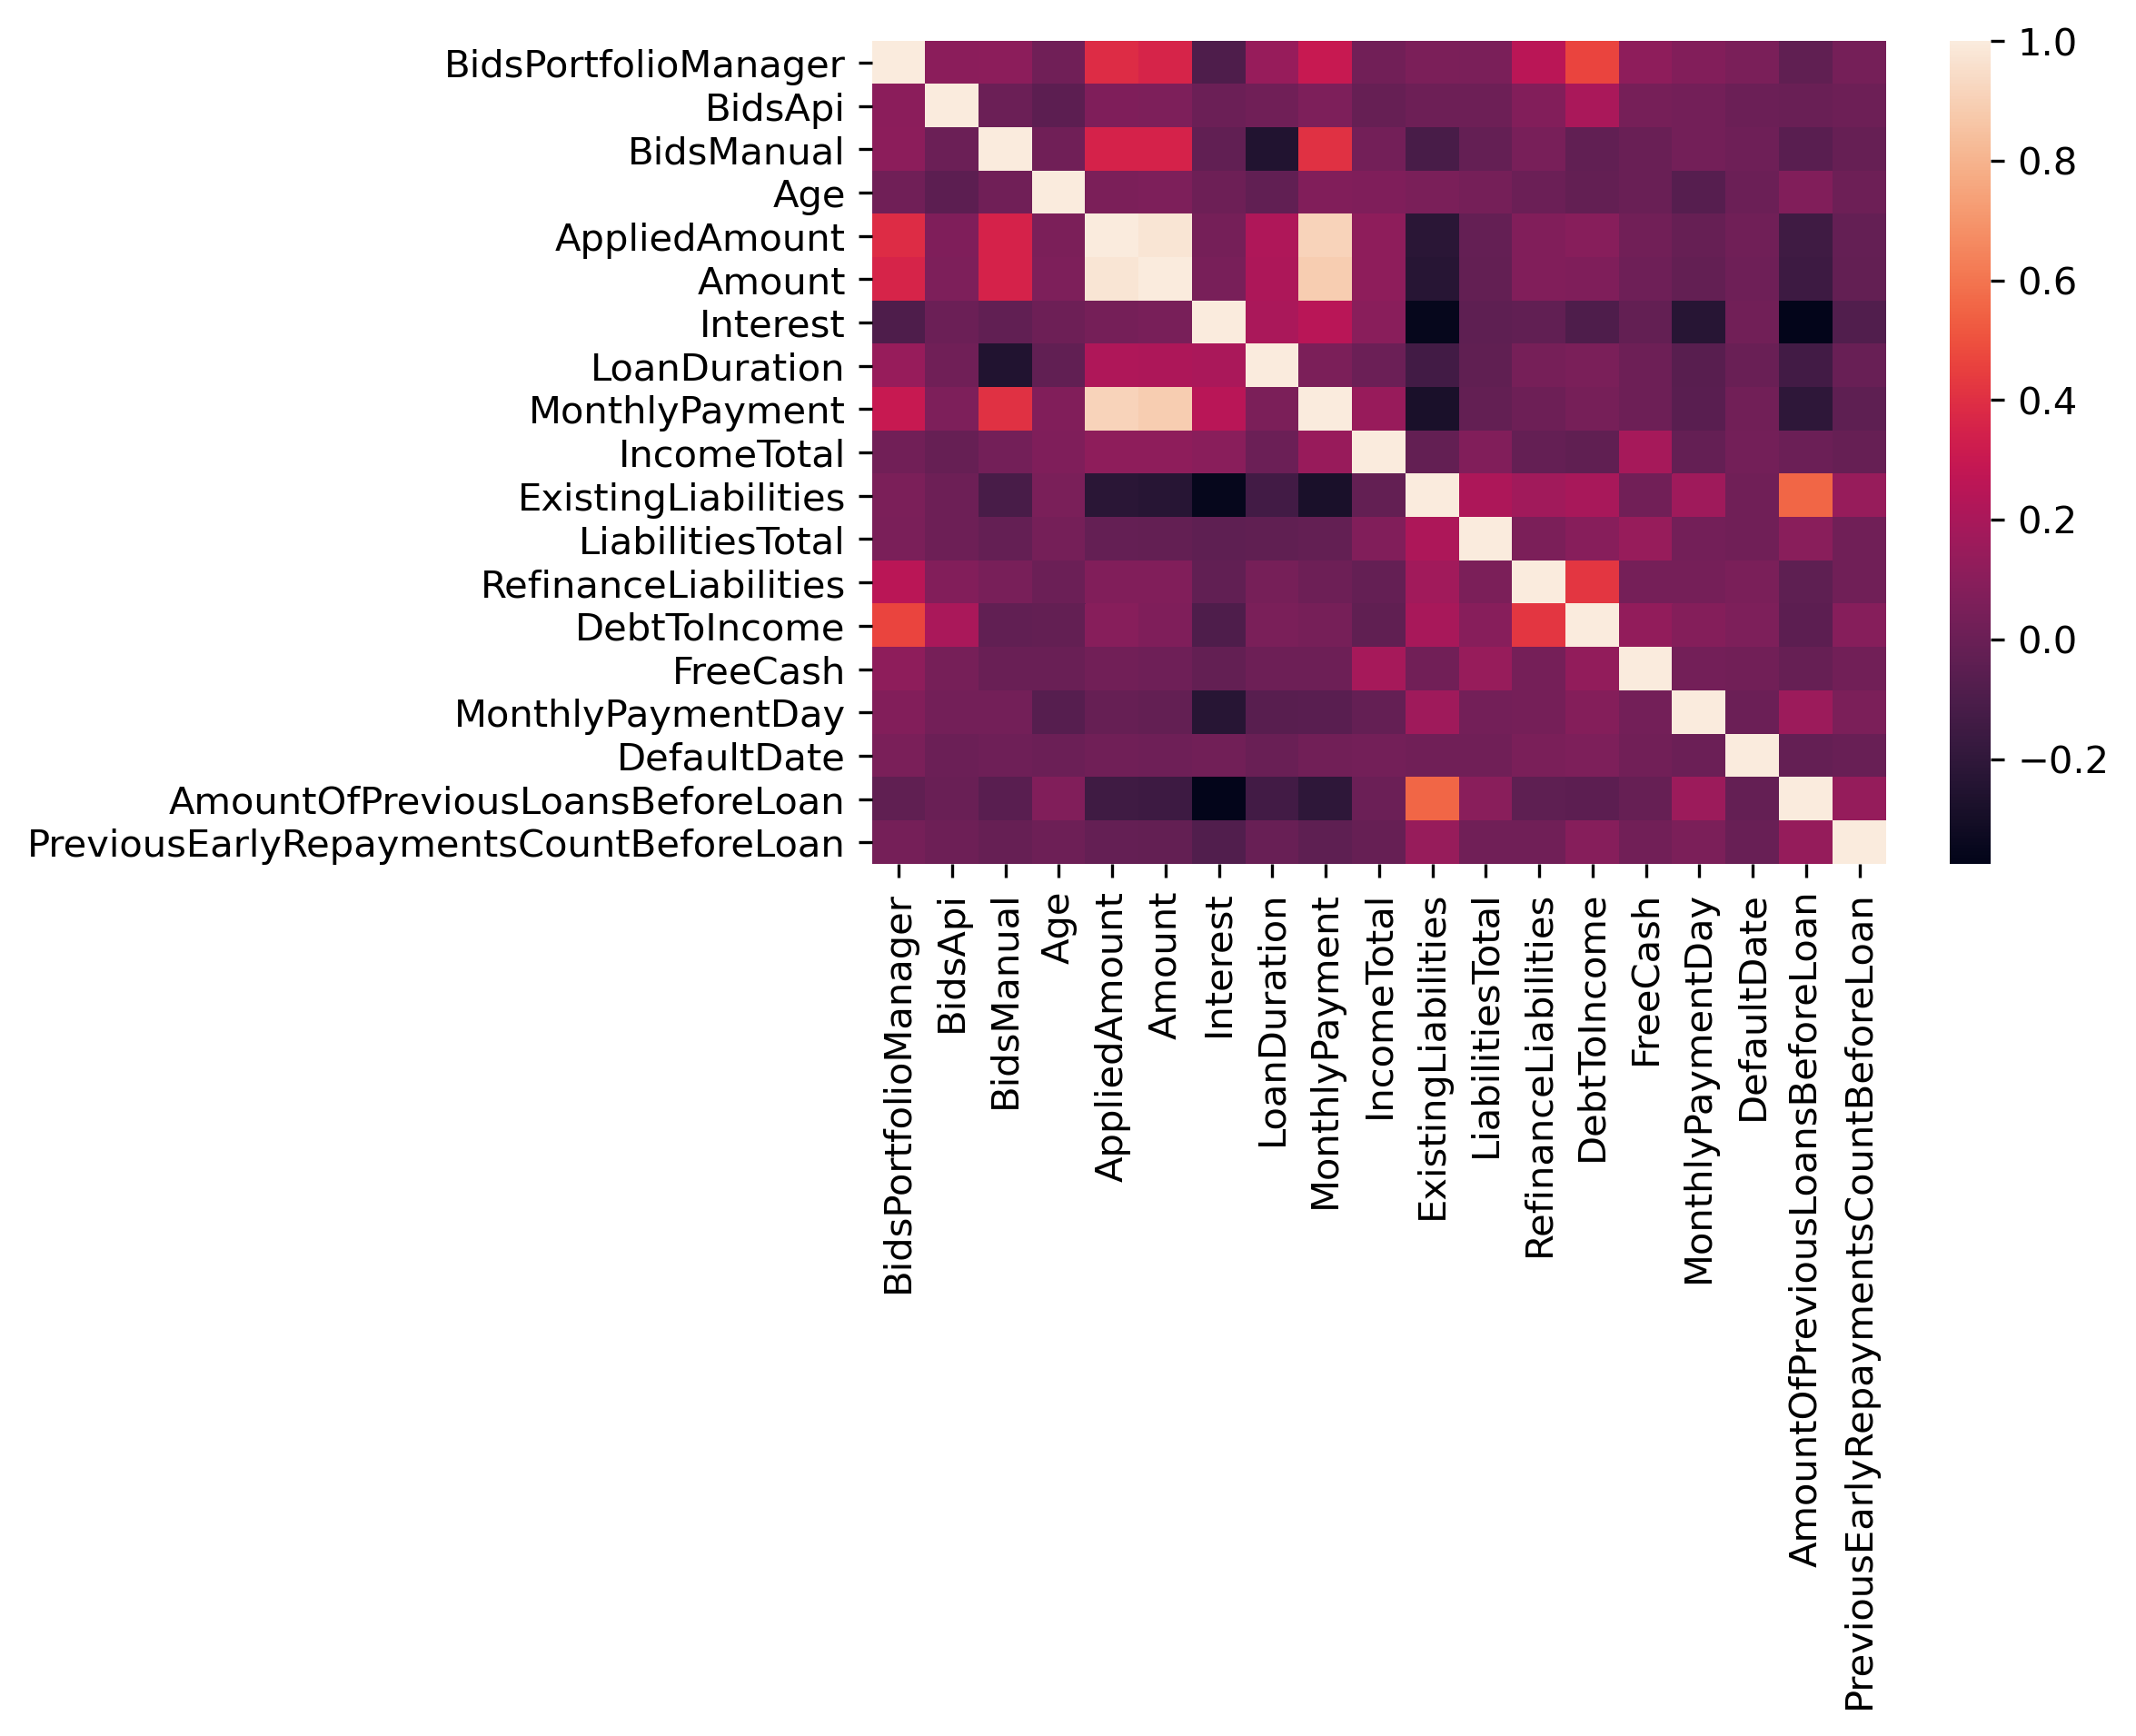

In [22]:
#checking correlation between numerical variables
temp = df.copy()
numerical = temp.columns[df.dtypes != 'object']
num_vars = temp[numerical]
sns.heatmap(num_vars.corr())

Amount is highly correlated with AppliedAmount and MonthlyPayment. 
BidsPortfolioManager is highly correlated with AppliedAmount/Amount

but only Amount should be removed because it's redundant
MonthlyPayment and BidsPortfolioManager could still be useful

In [23]:
df.drop(labels = ['AppliedAmount'], axis = 1, inplace = True)

In [24]:
# checking correlations manually
corrs = num_vars.corr()
correlated_feature_pairs = []
for i, row in enumerate(corrs.values):
    for j, corr_val in enumerate(row):
        if 1 > corr_val > 0.5:
            if (i, j) not in correlated_feature_pairs \
                or (j, i) not in correlated_feature_pairs:
                correlated_feature_pairs.append((i, j))

In [25]:
for pair in correlated_feature_pairs:
    print(f'({num_vars.columns[pair[0]]}, {num_vars.columns[pair[1]]})')

(AppliedAmount, Amount)
(AppliedAmount, MonthlyPayment)
(Amount, AppliedAmount)
(Amount, MonthlyPayment)
(MonthlyPayment, AppliedAmount)
(MonthlyPayment, Amount)
(ExistingLiabilities, AmountOfPreviousLoansBeforeLoan)
(AmountOfPreviousLoansBeforeLoan, ExistingLiabilities)


In [26]:
# kdeplot
v = ['BidsPortfolioManager', 'BidsApi', 'BidsManual','Interest', 'LoanDuration', 'MonthlyPayment','IncomeTotal', 
     'ExistingLiabilities','LiabilitiesTotal', 'DebtToIncome', 'MonthlyPaymentDay', 'PreviousEarlyRepaymentsCountBeforeLoan']

In [27]:
# boxplot
b_vars = ['Age', 'Amount','LiabilitiesTotal']

In [28]:
to_plot = num_vars.sample(frac = 0.10, random_state = 111)

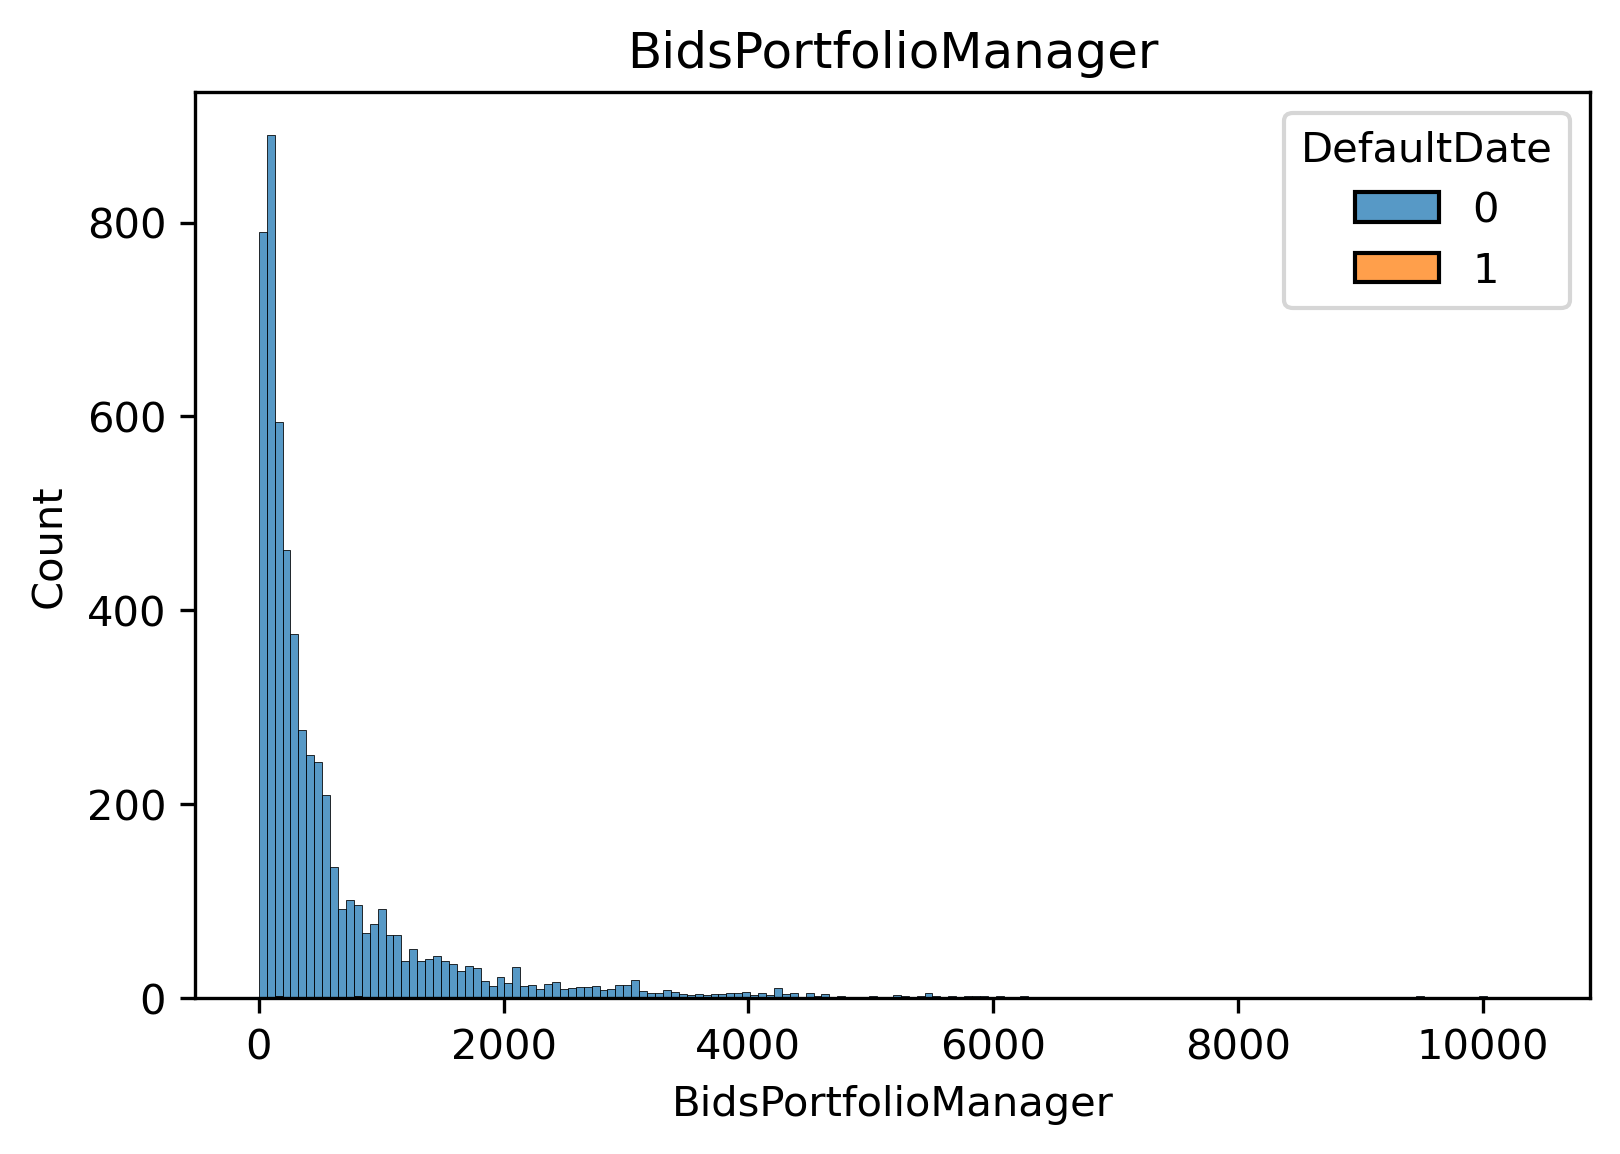

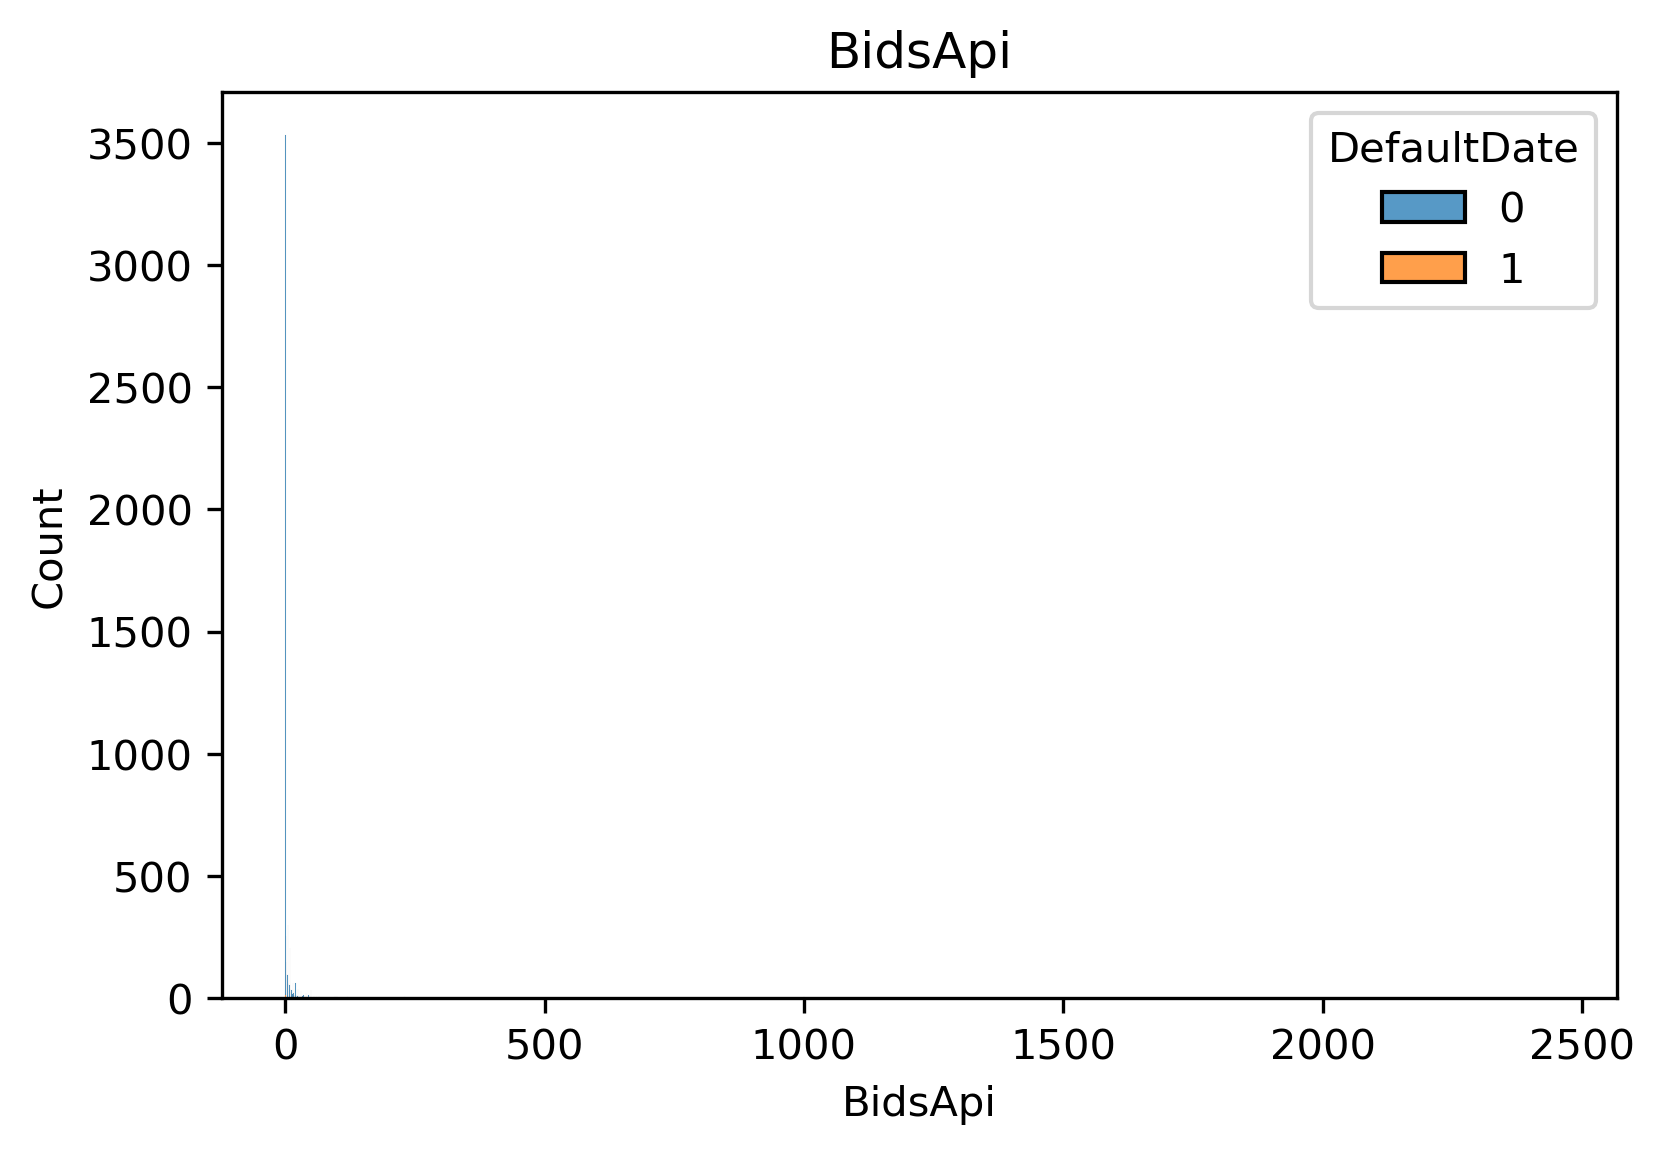

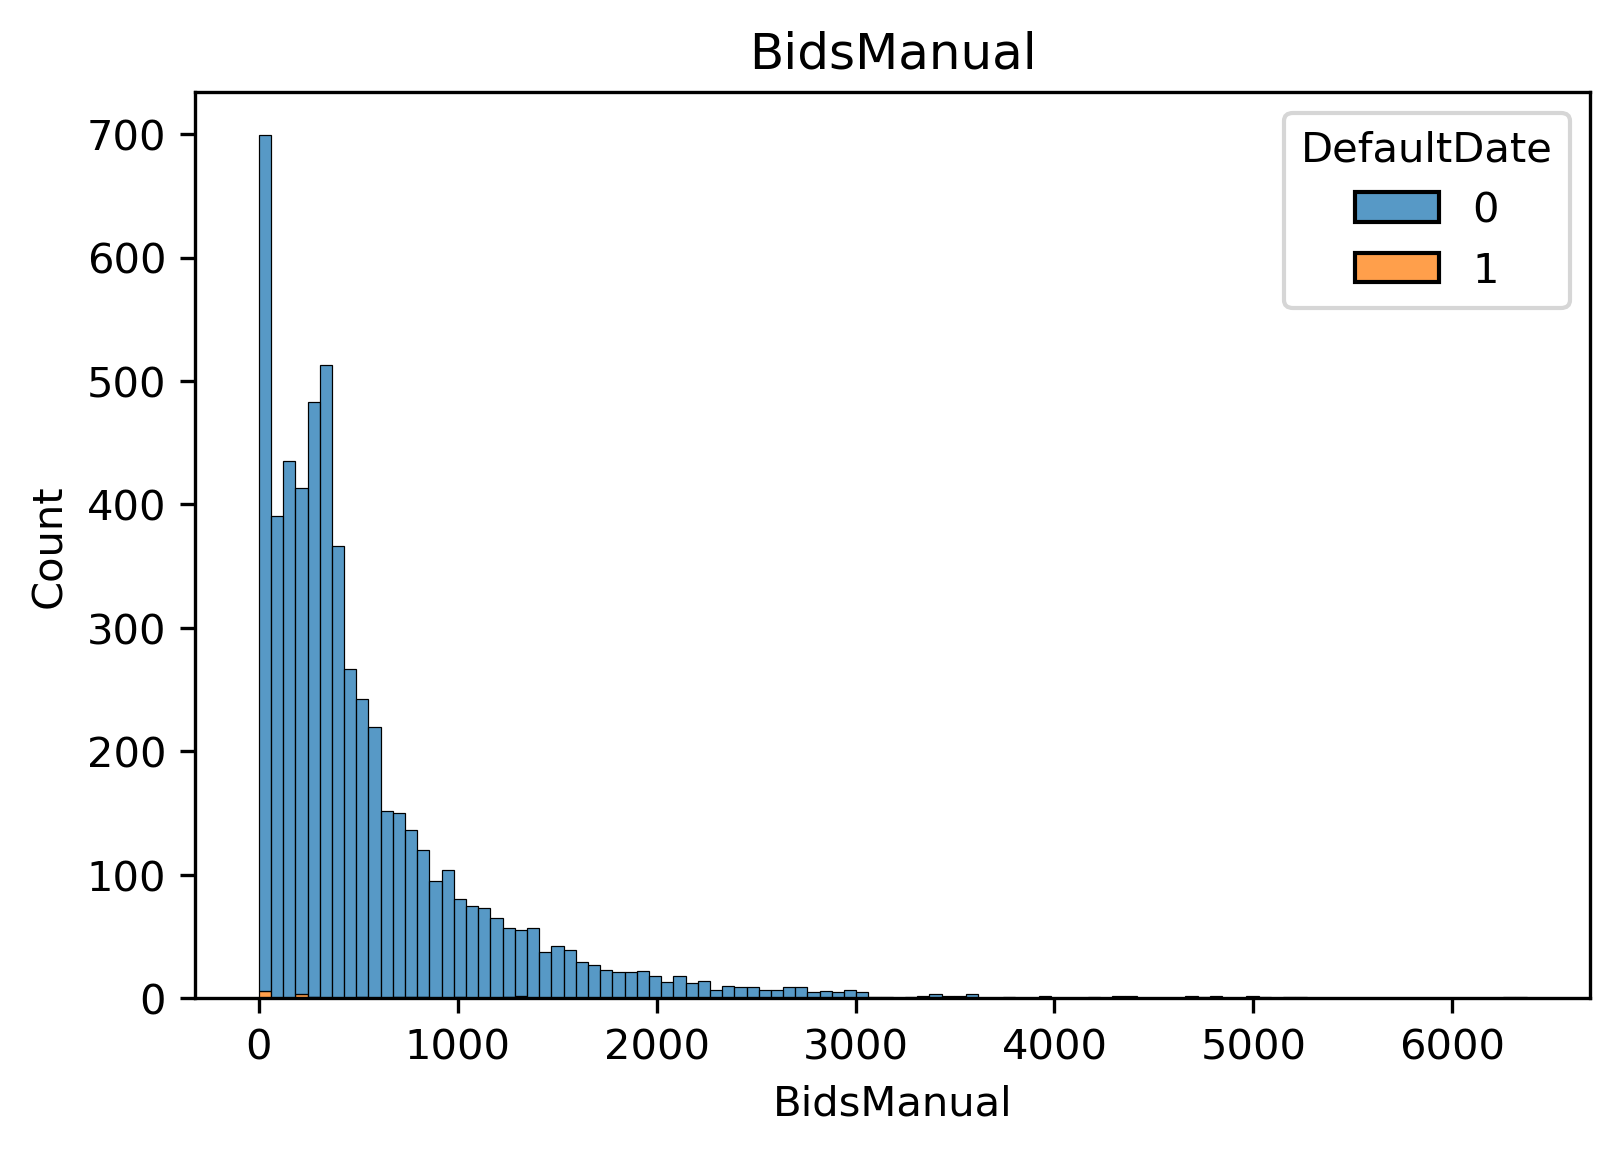

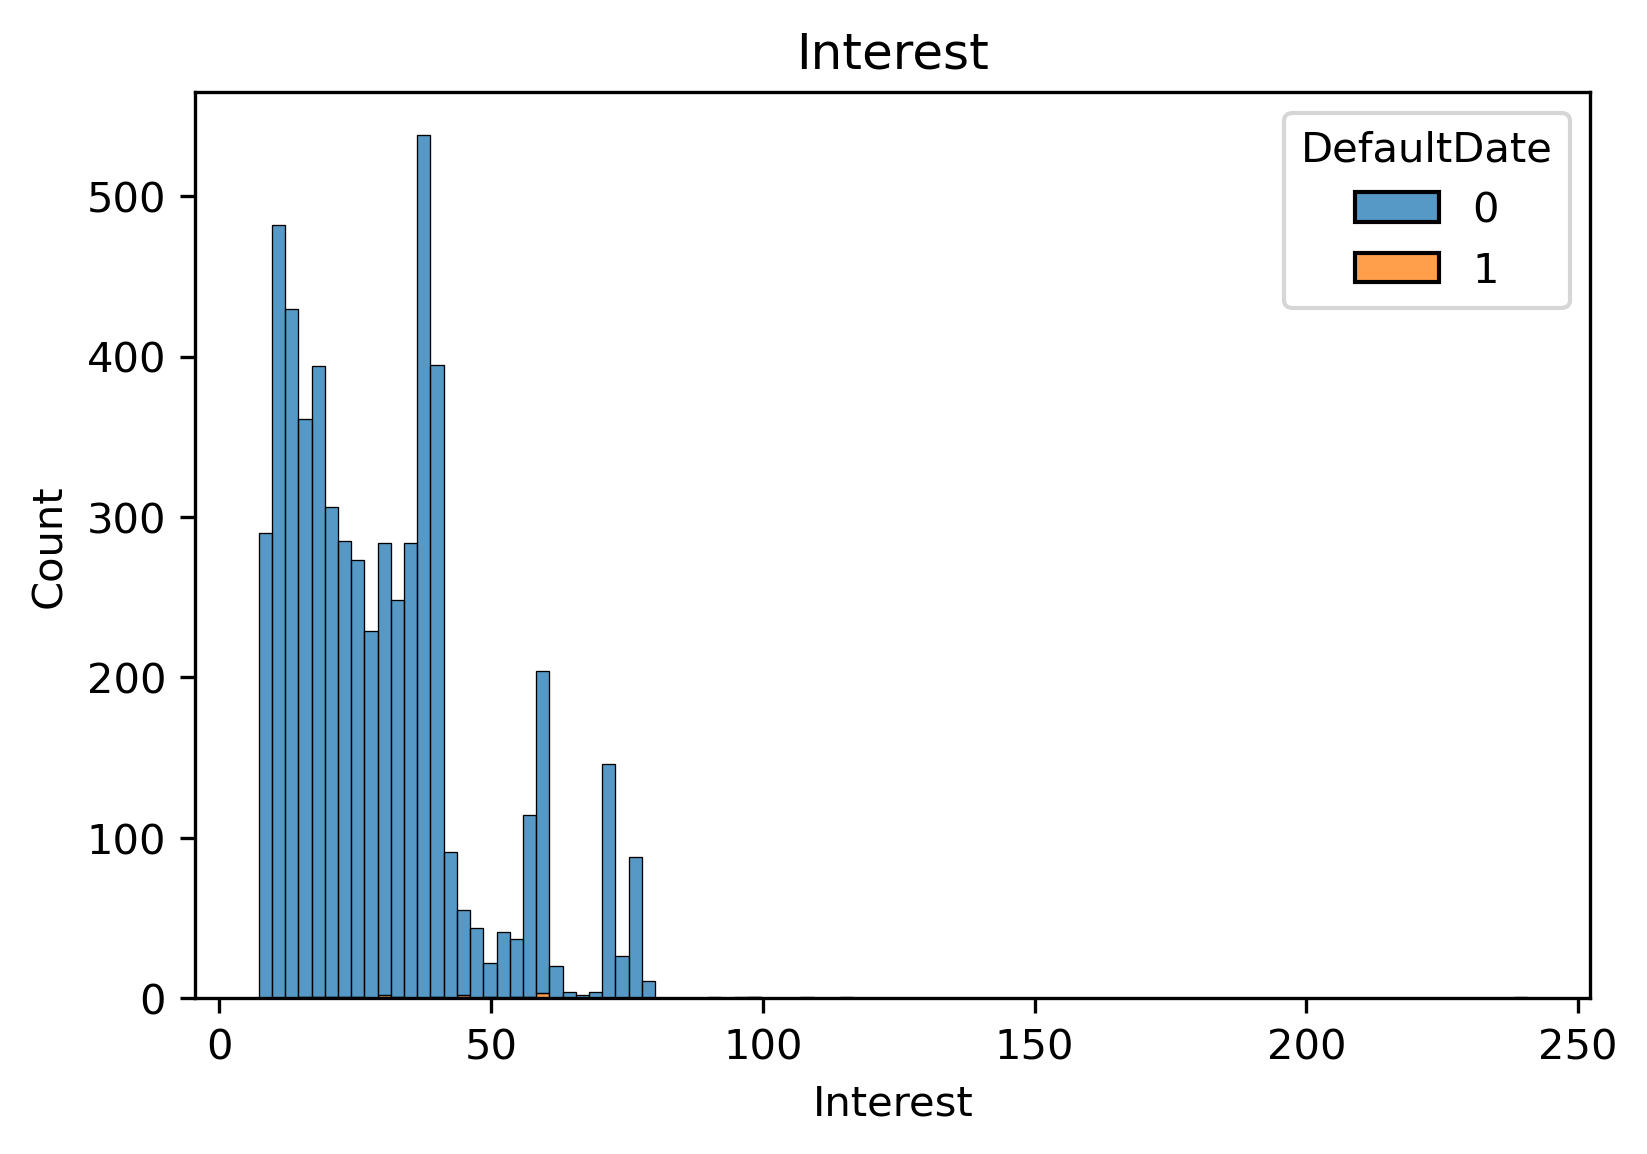

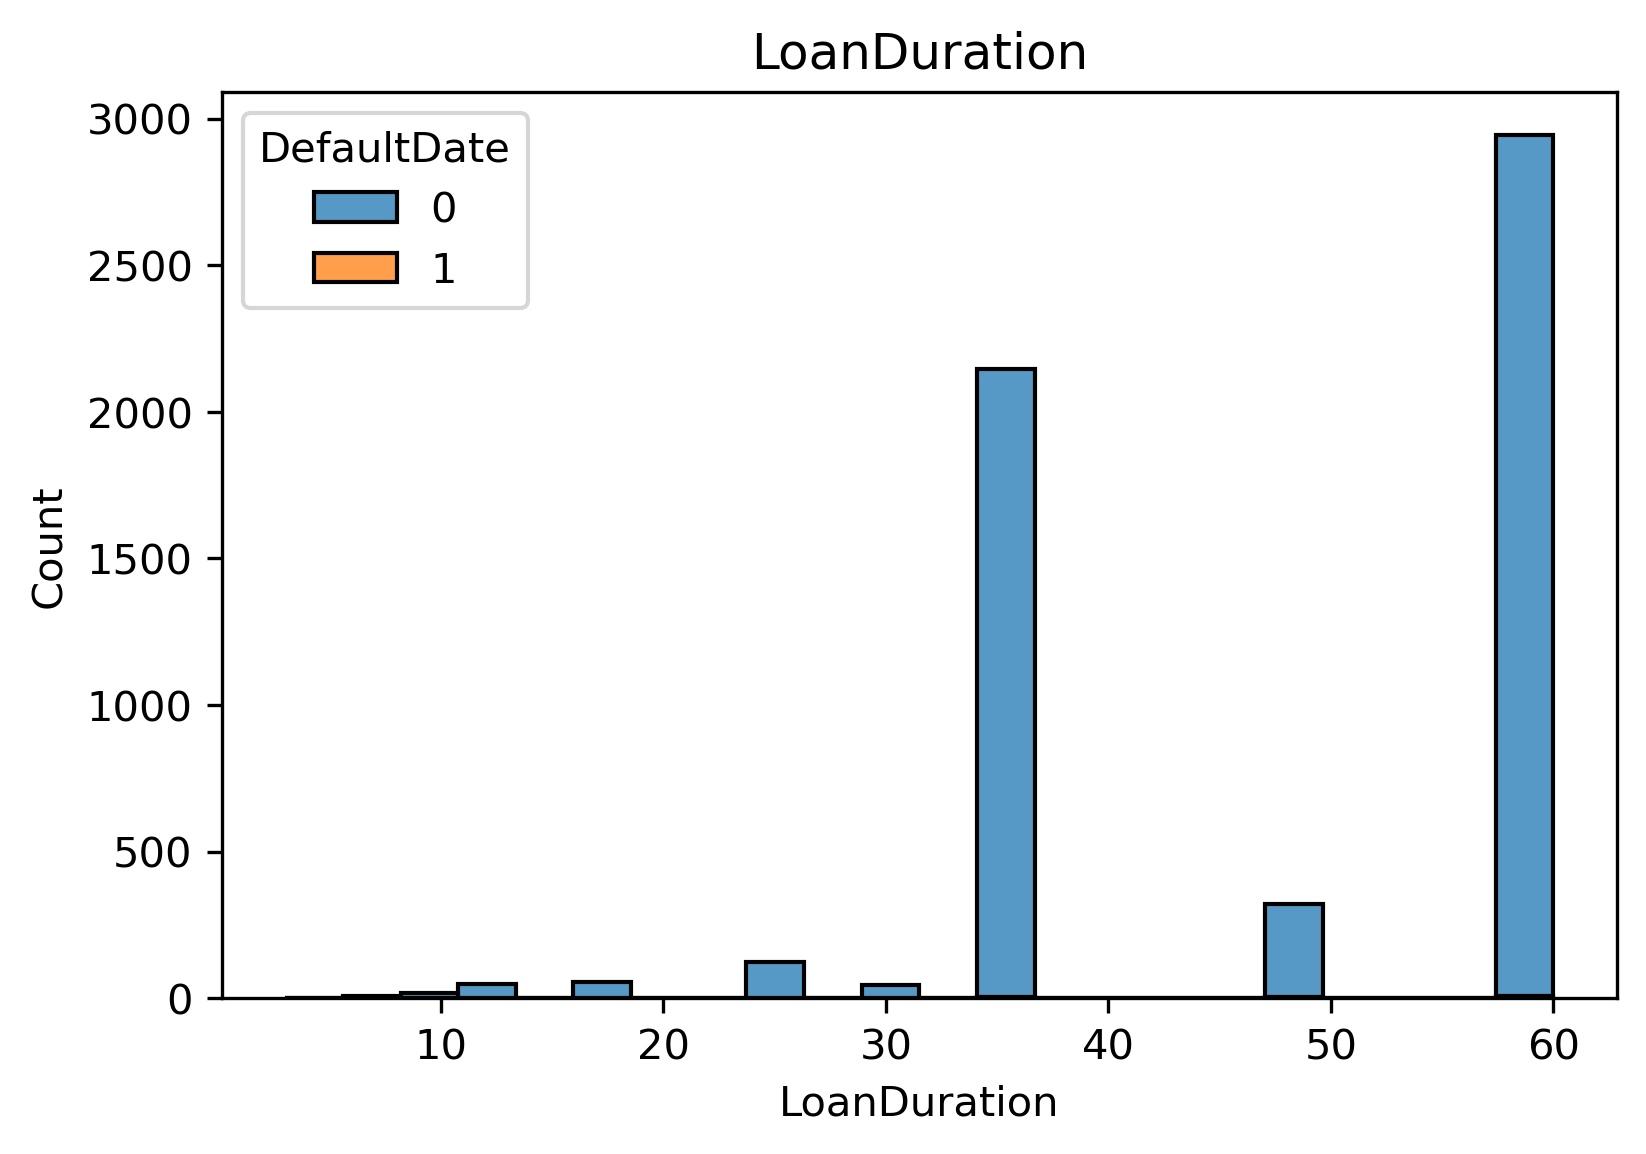

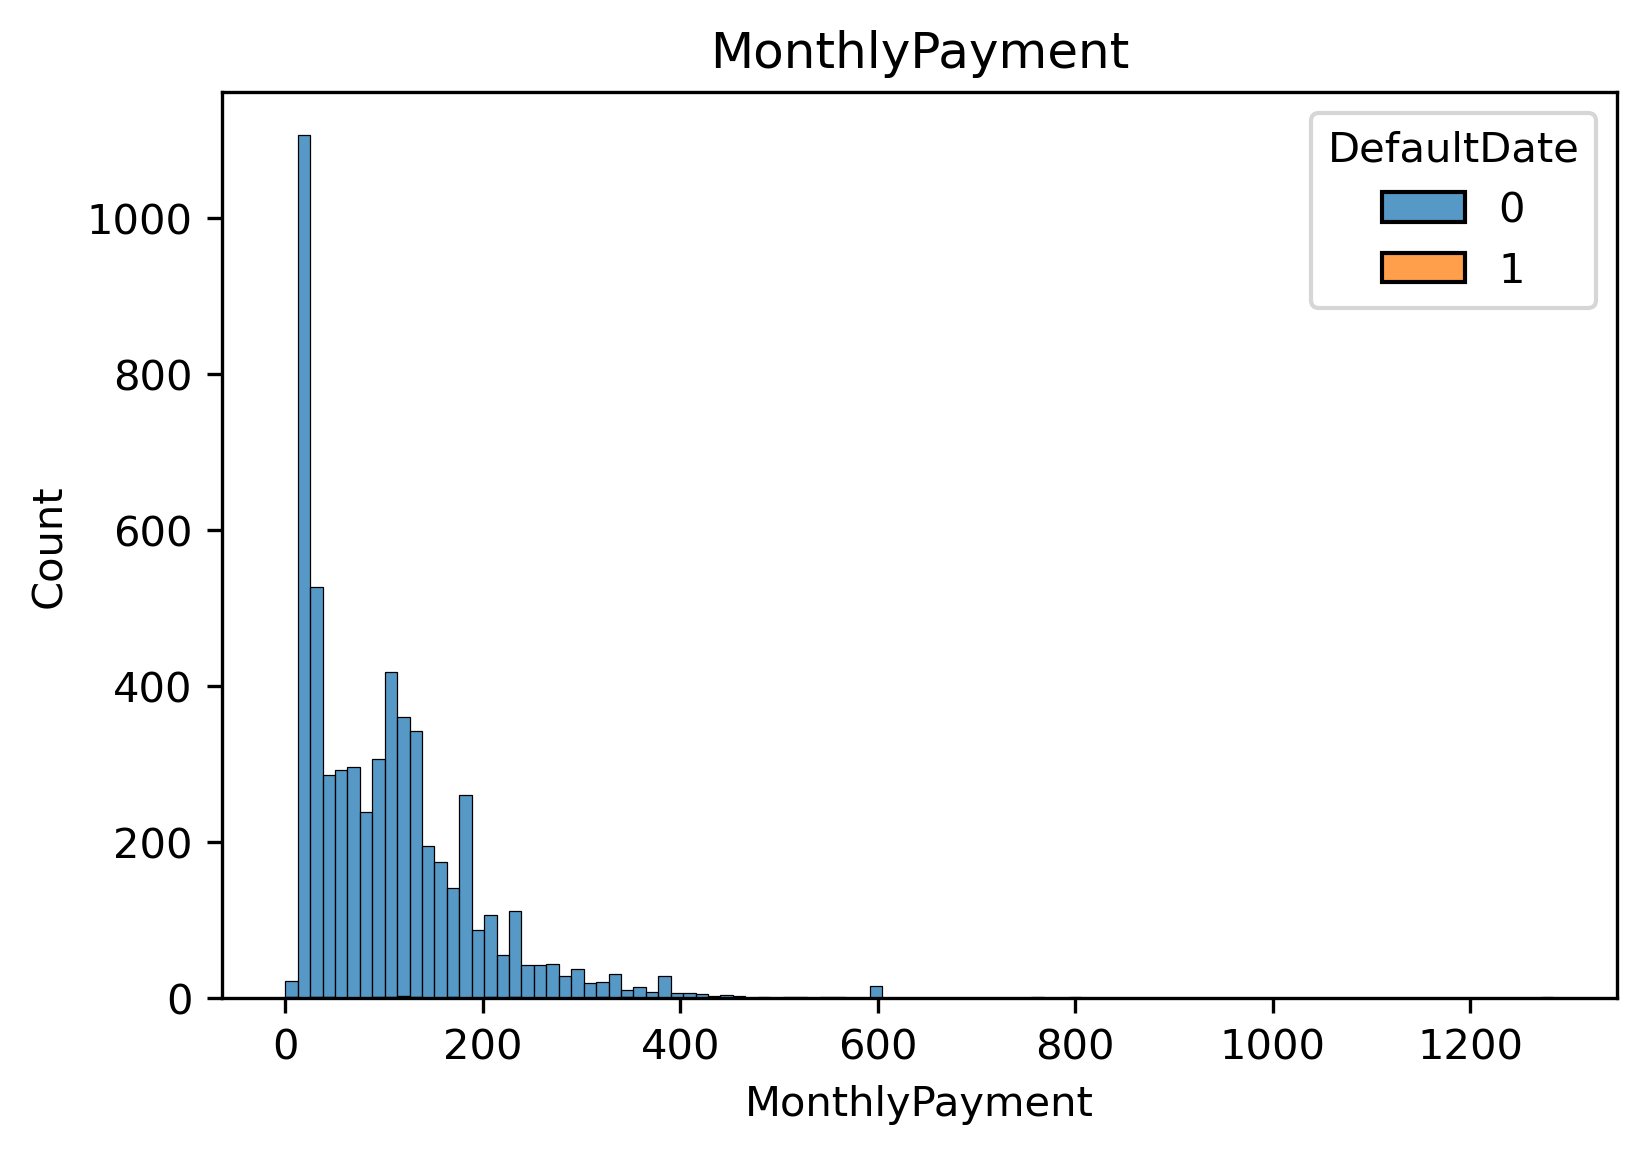

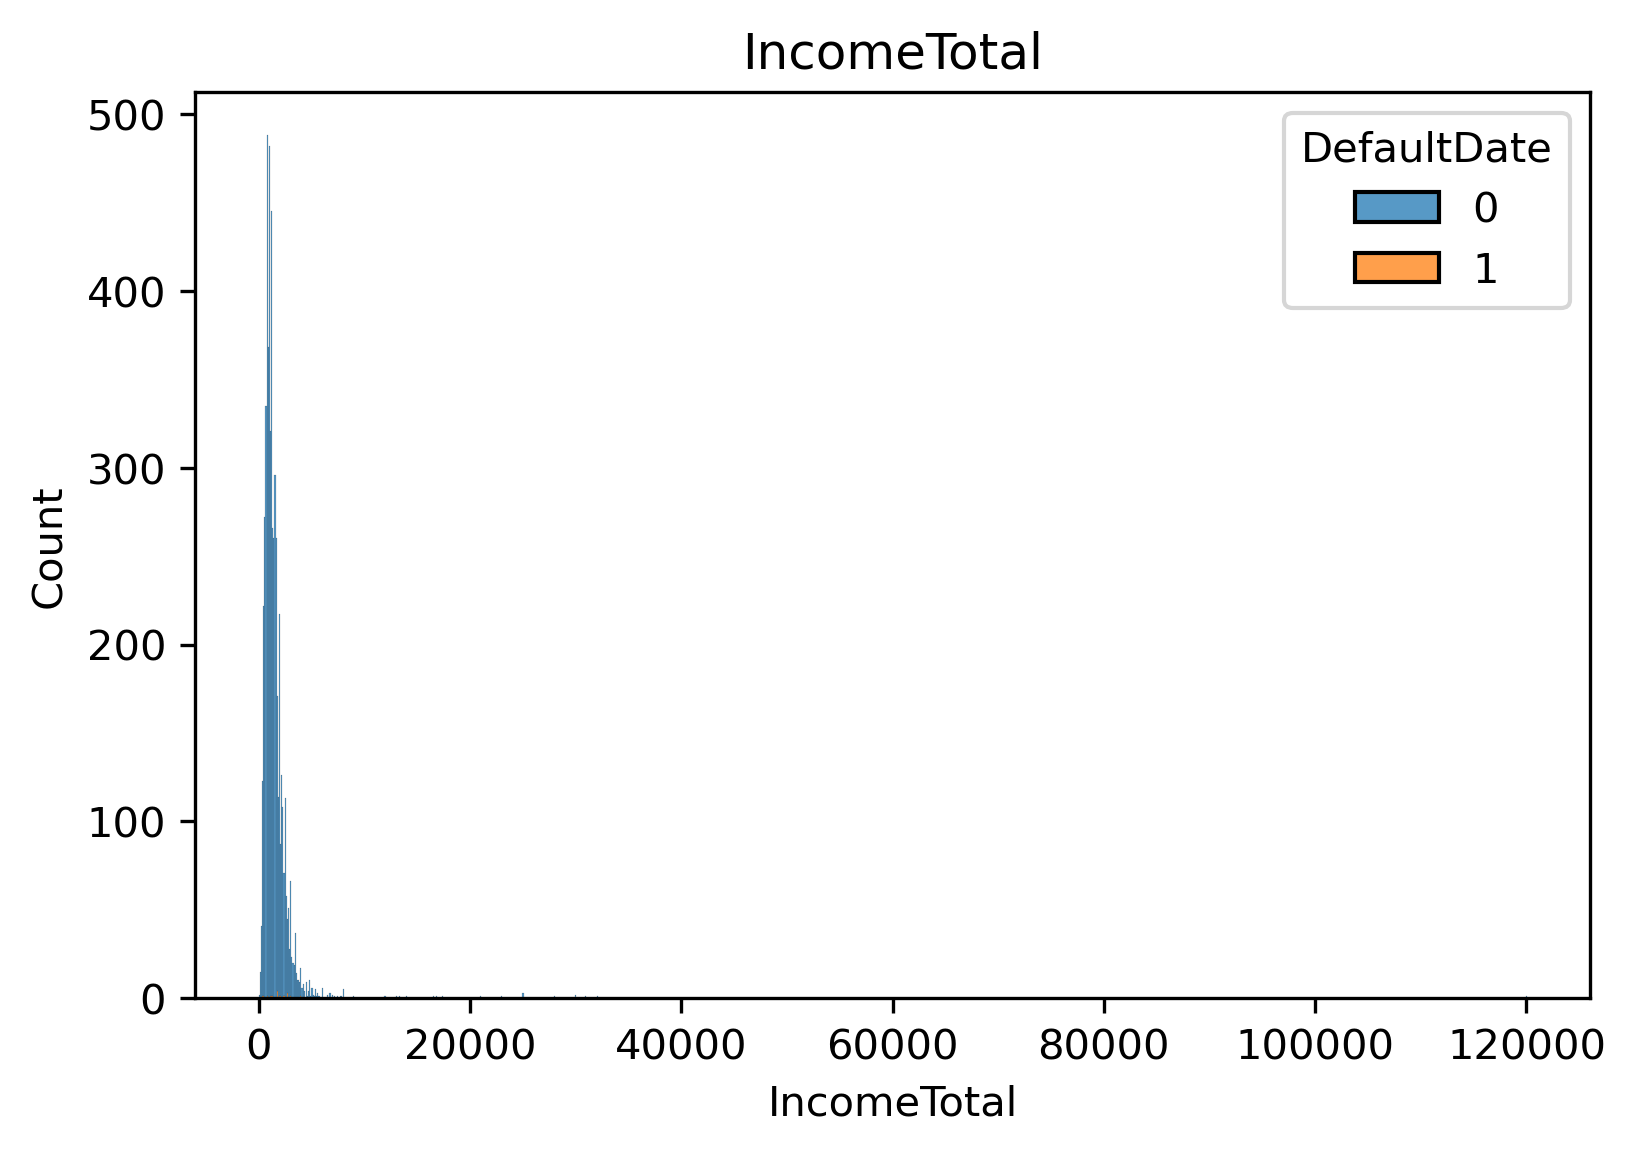

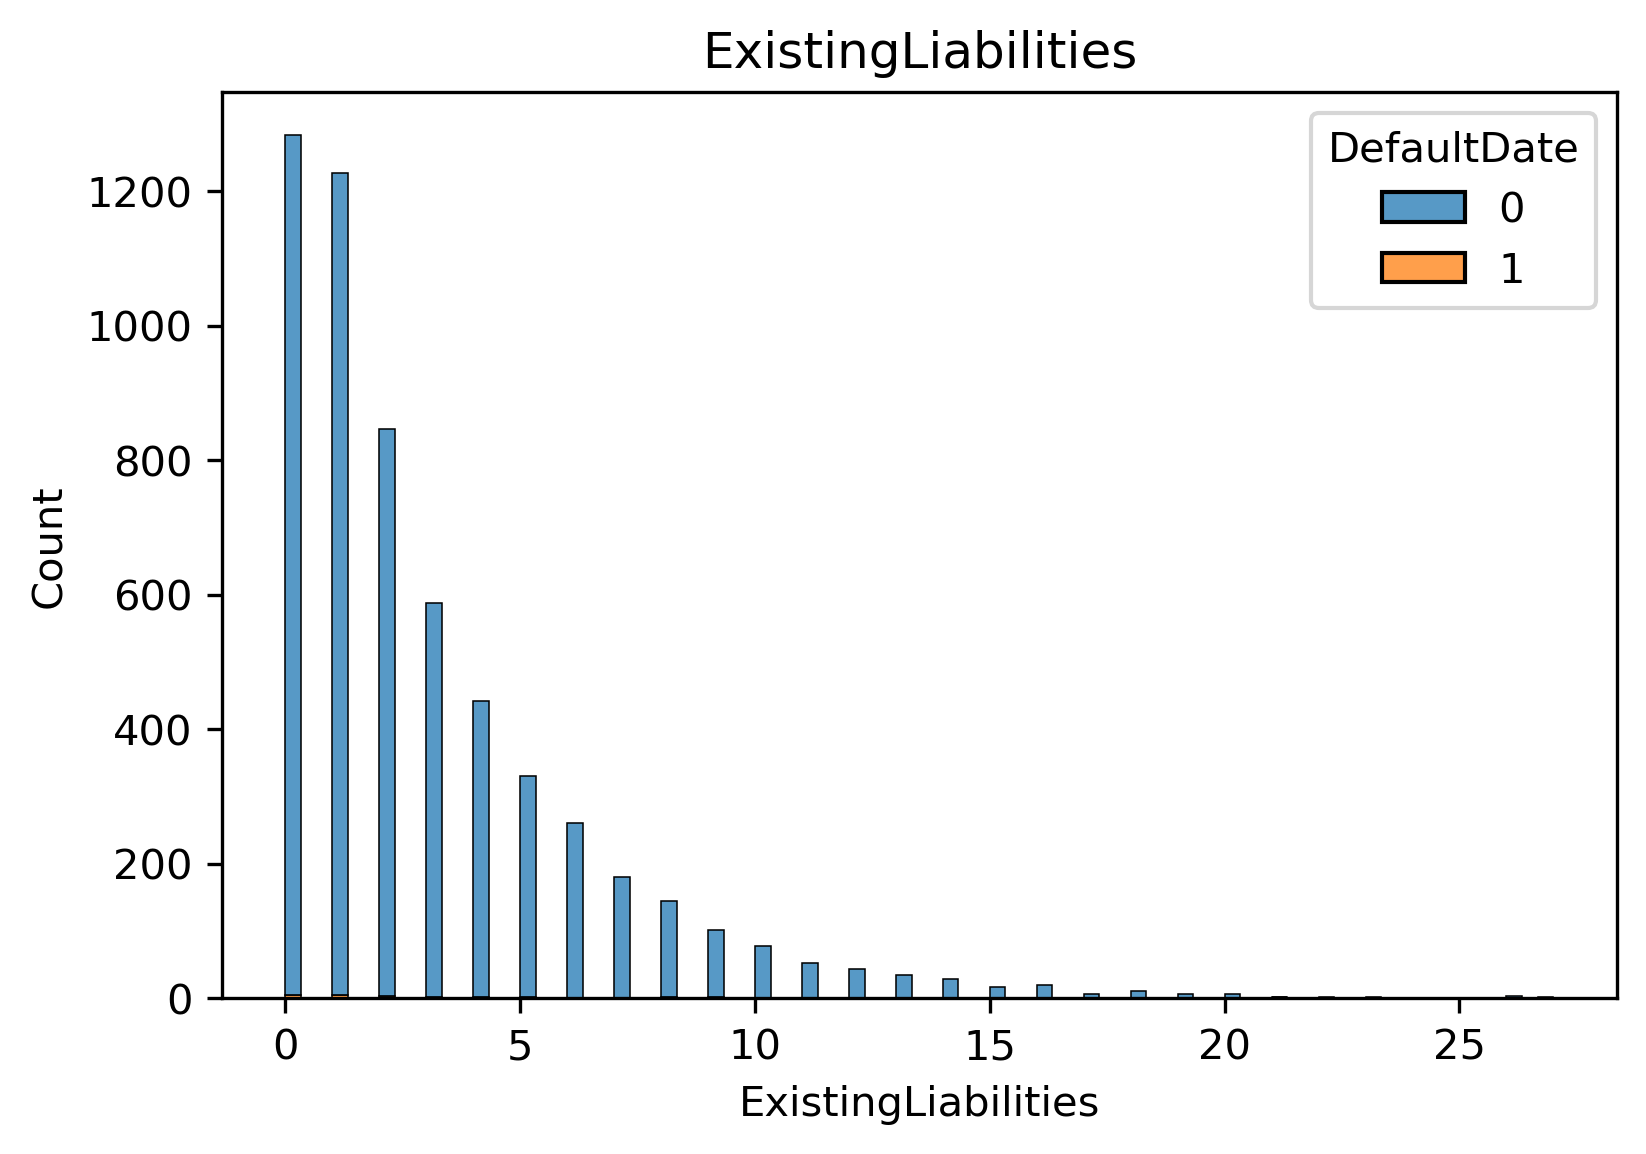

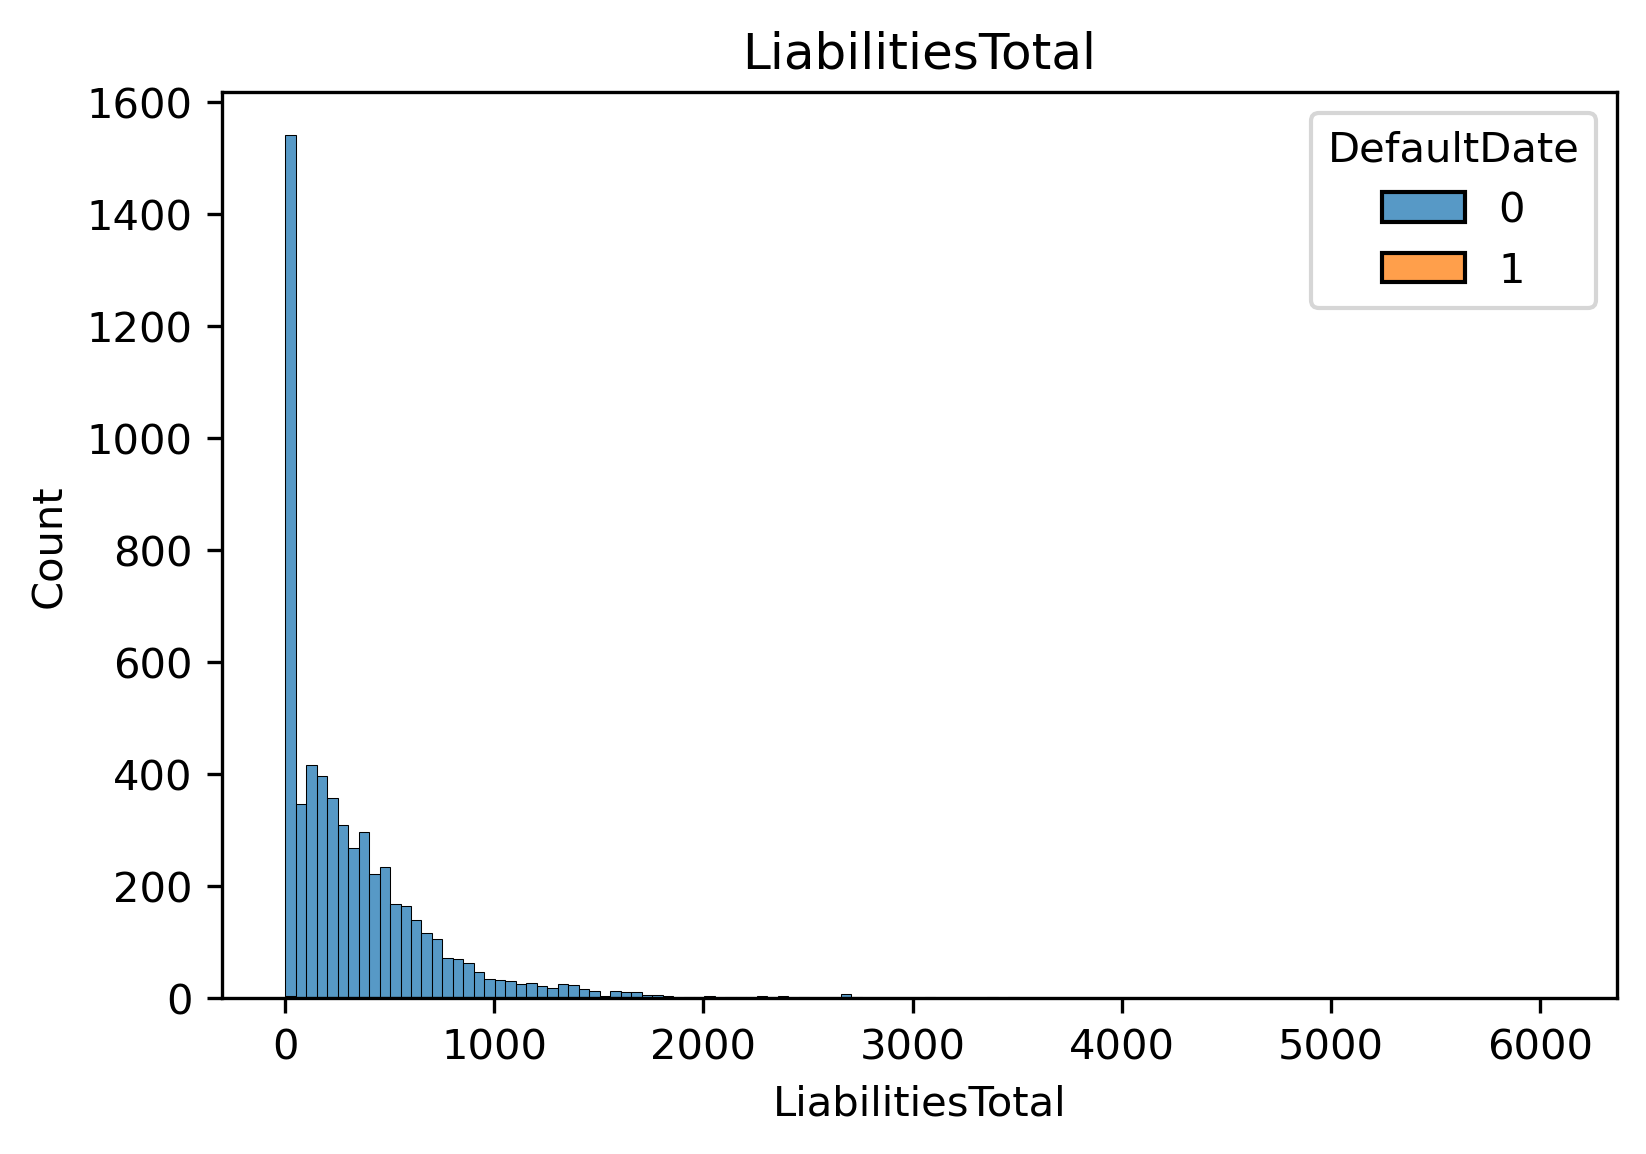

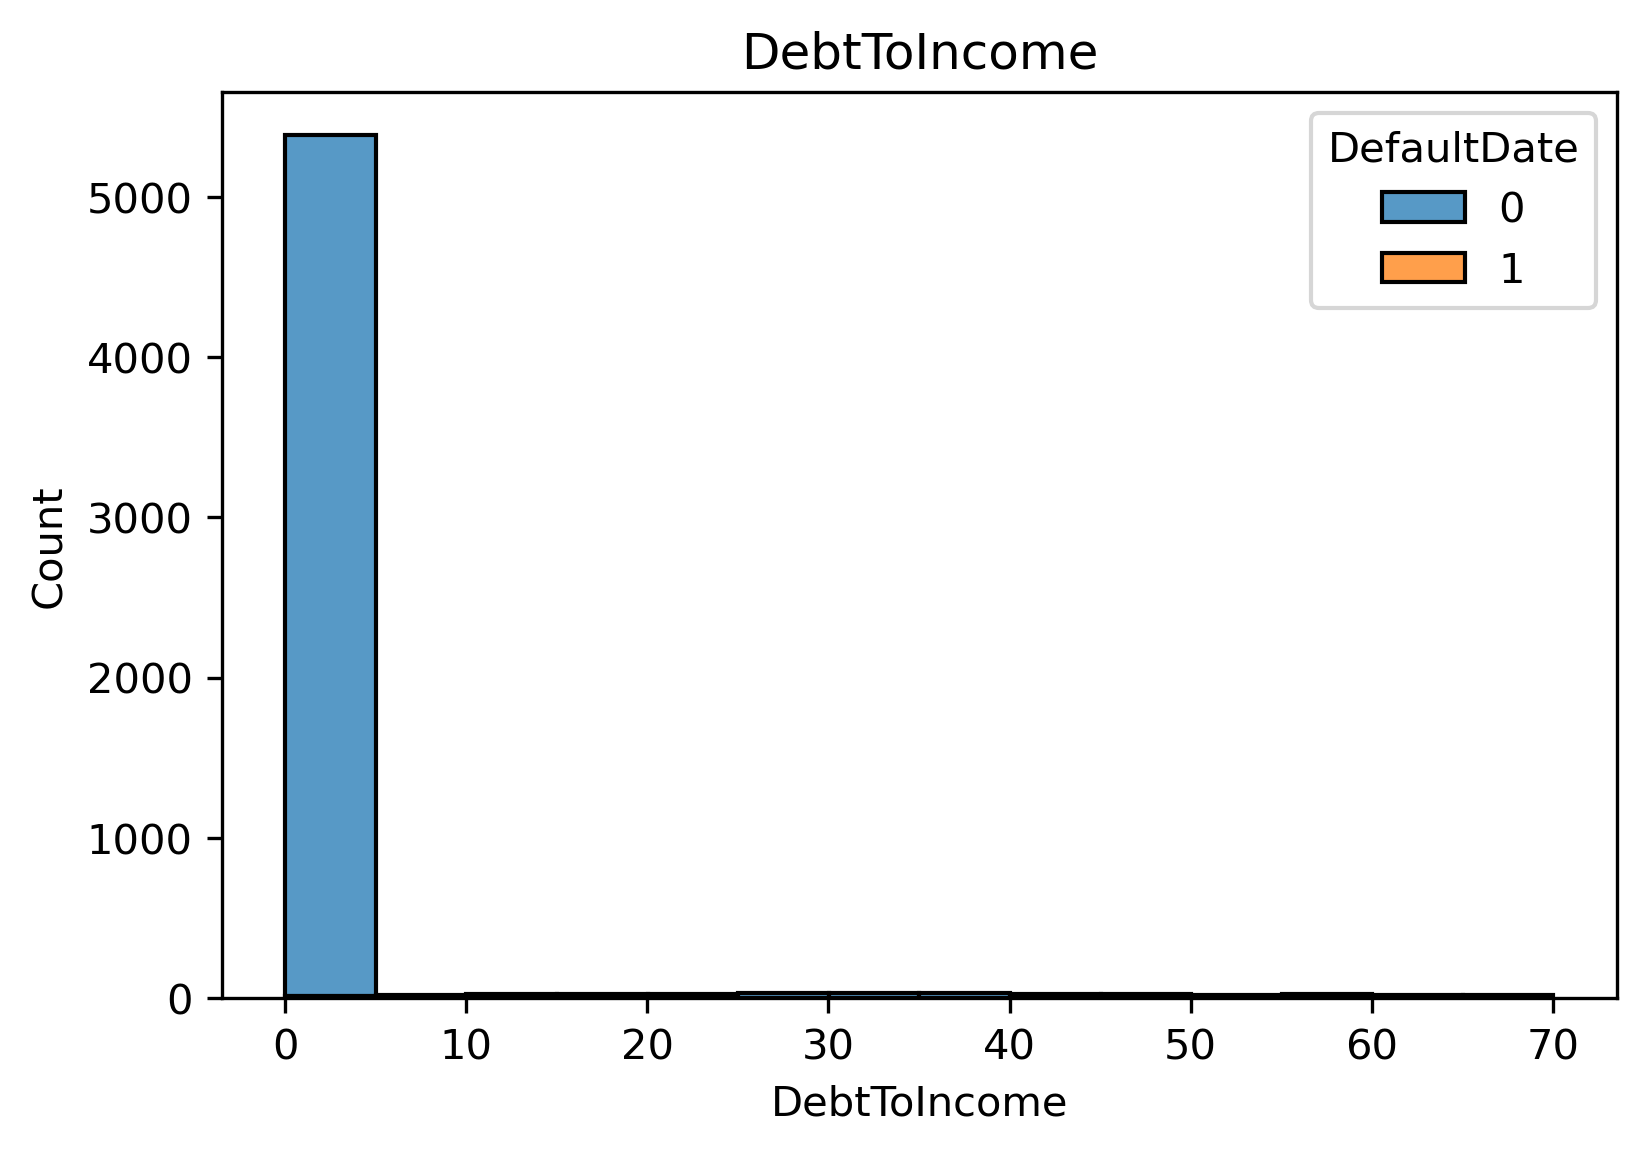

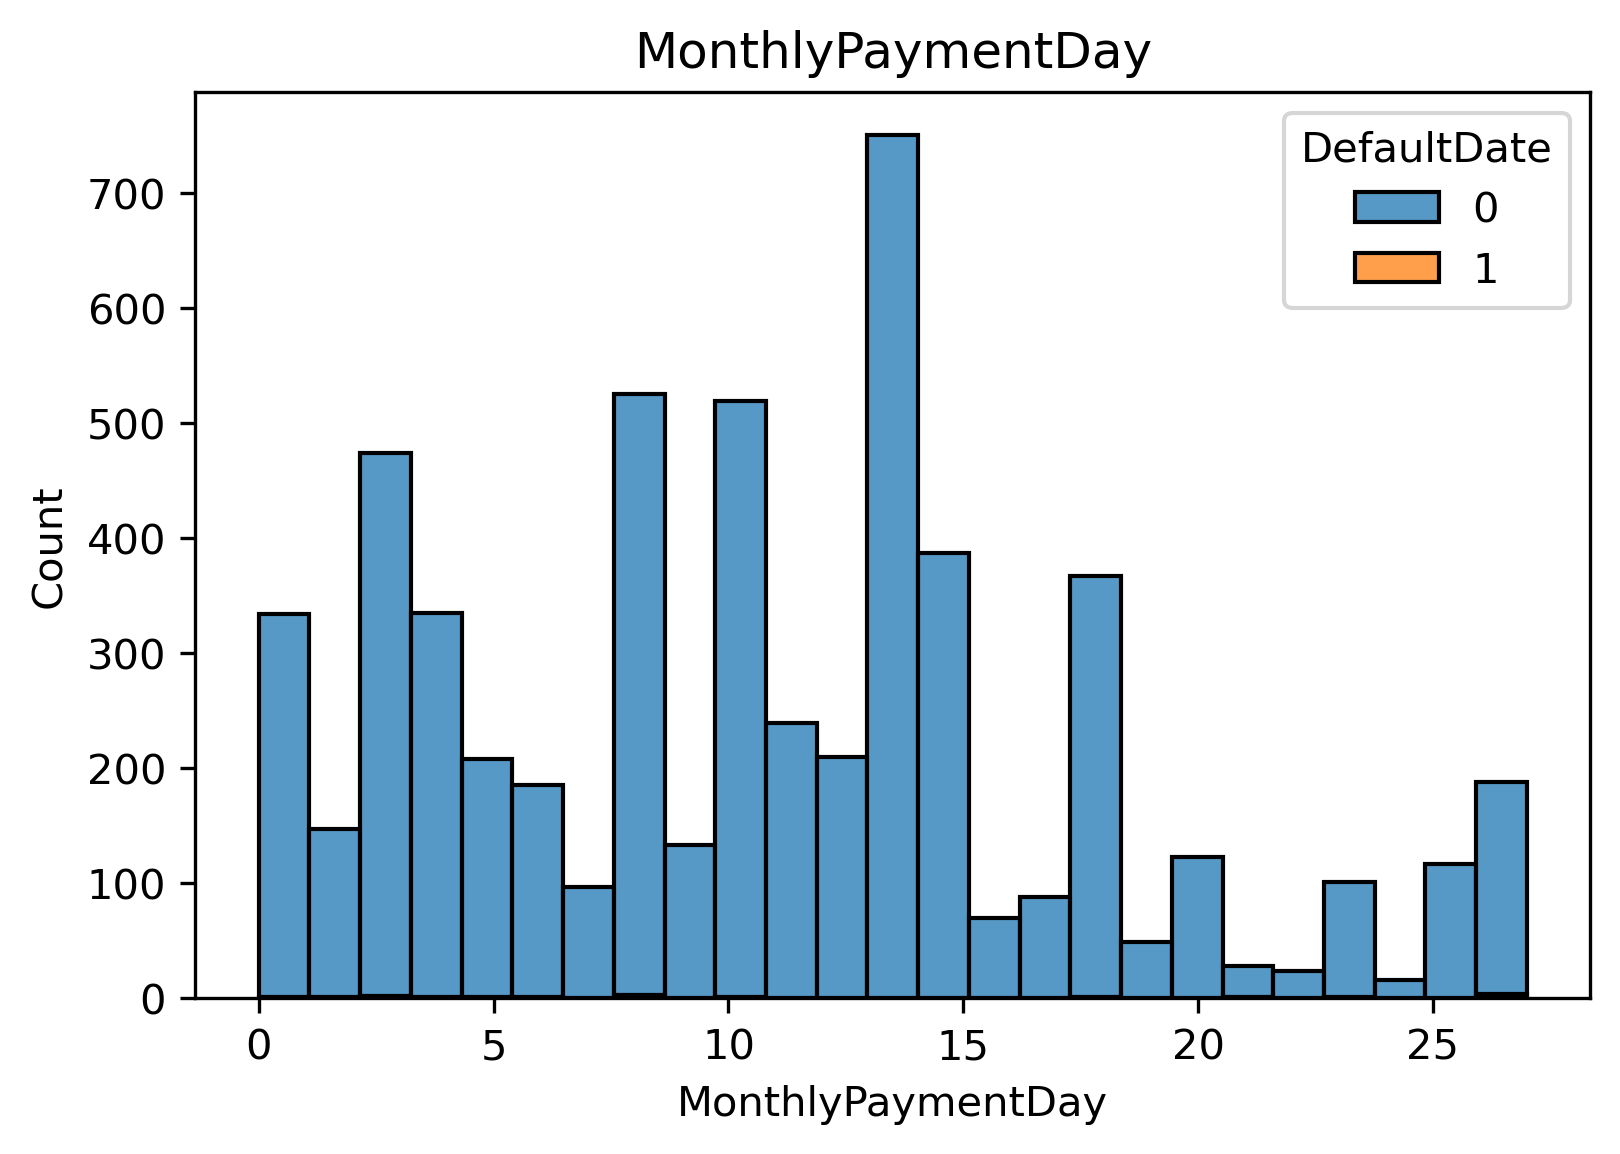

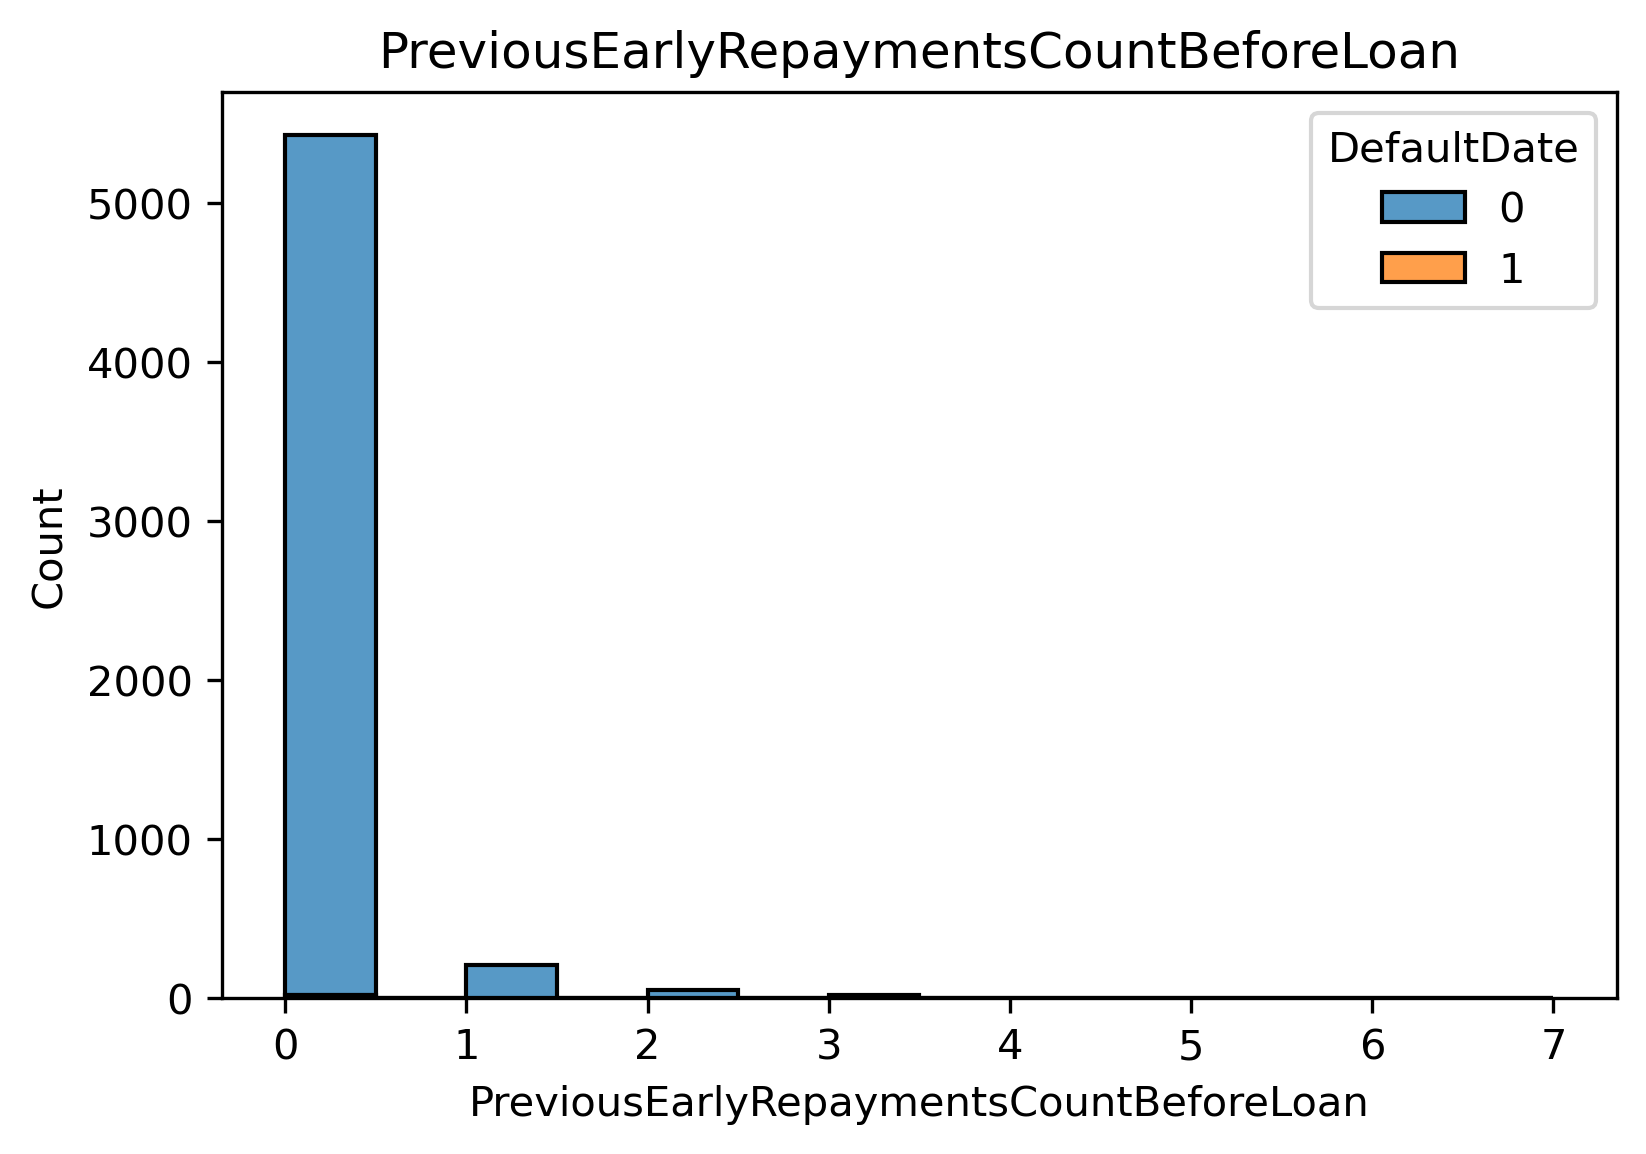

In [30]:
for col in v:
    ax = plt.subplot()
    sns.histplot(data = to_plot, x = col, hue = 'DefaultDate',multiple = 'stack', ax = ax)
    ax.set_title(f'{col}')
    plt.show()

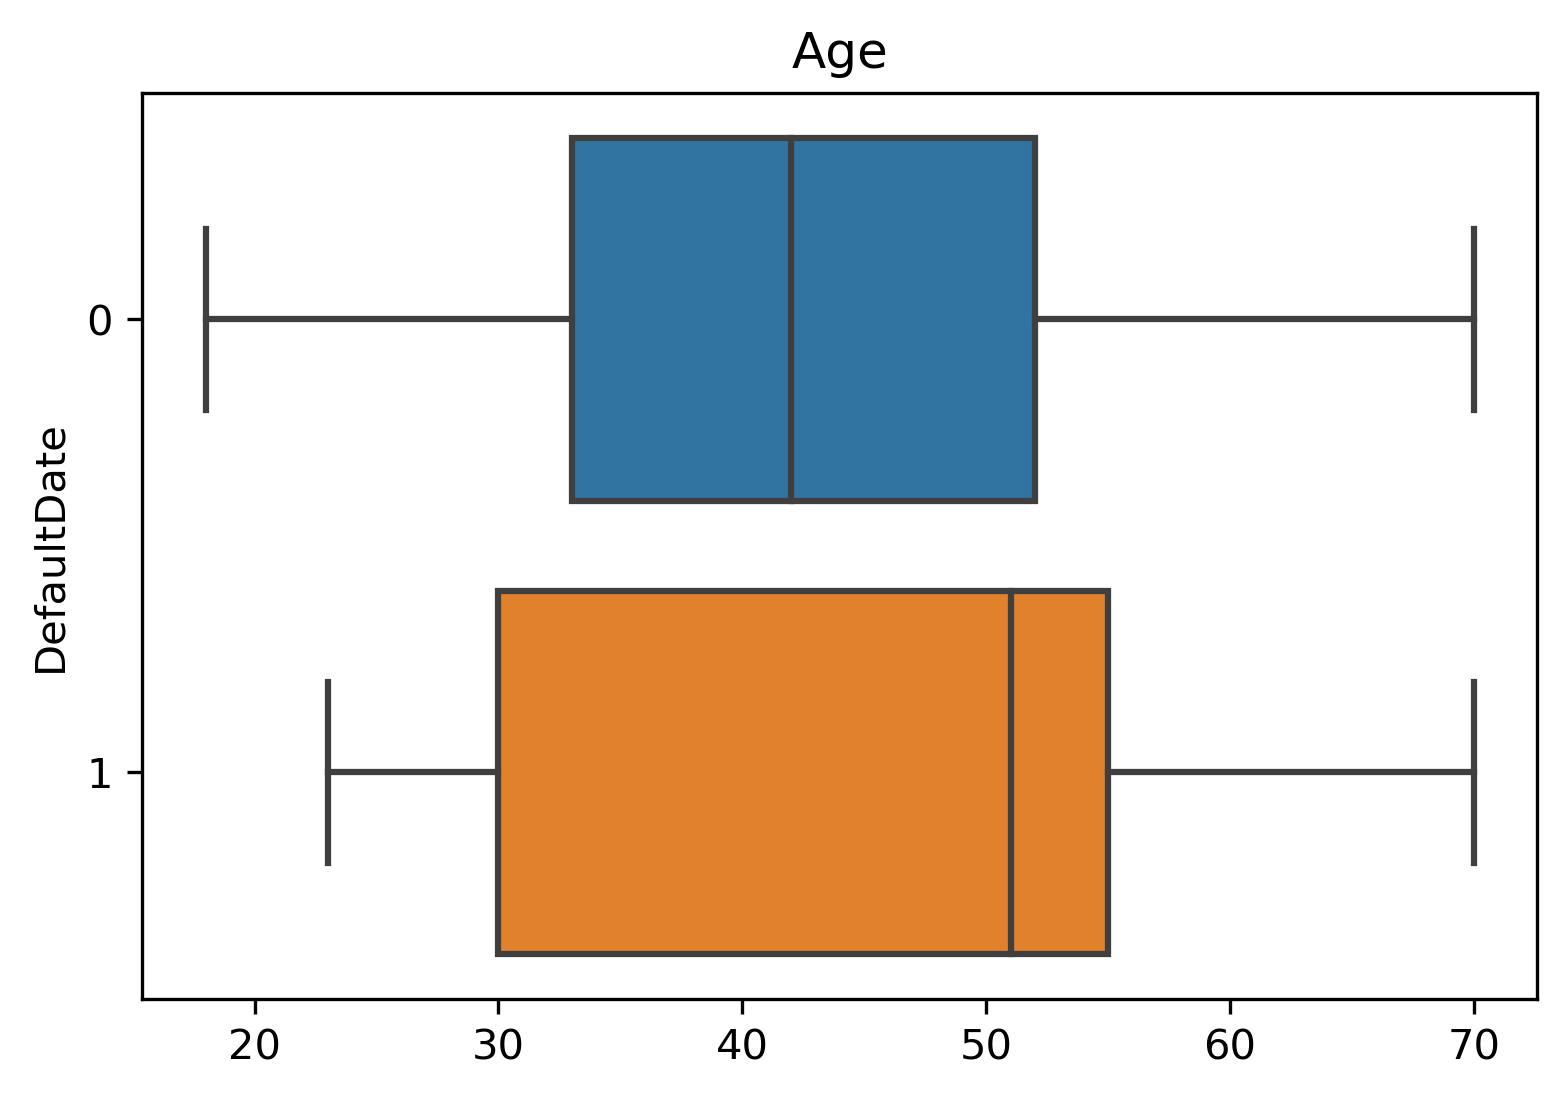

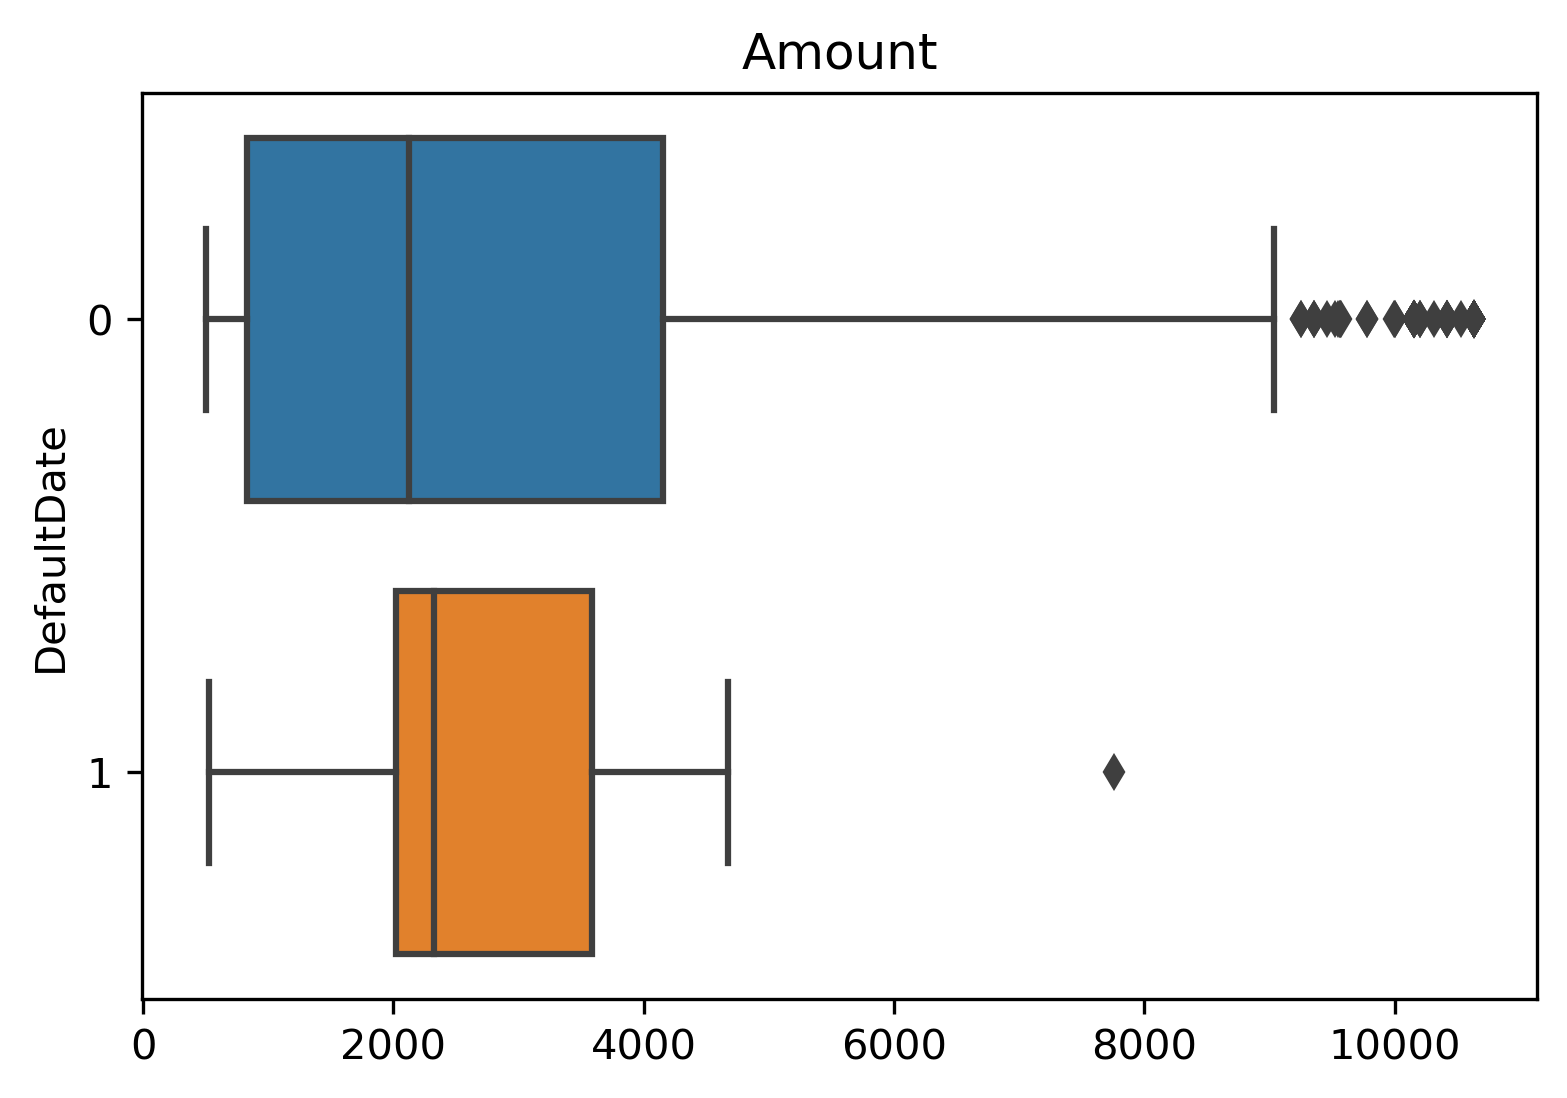

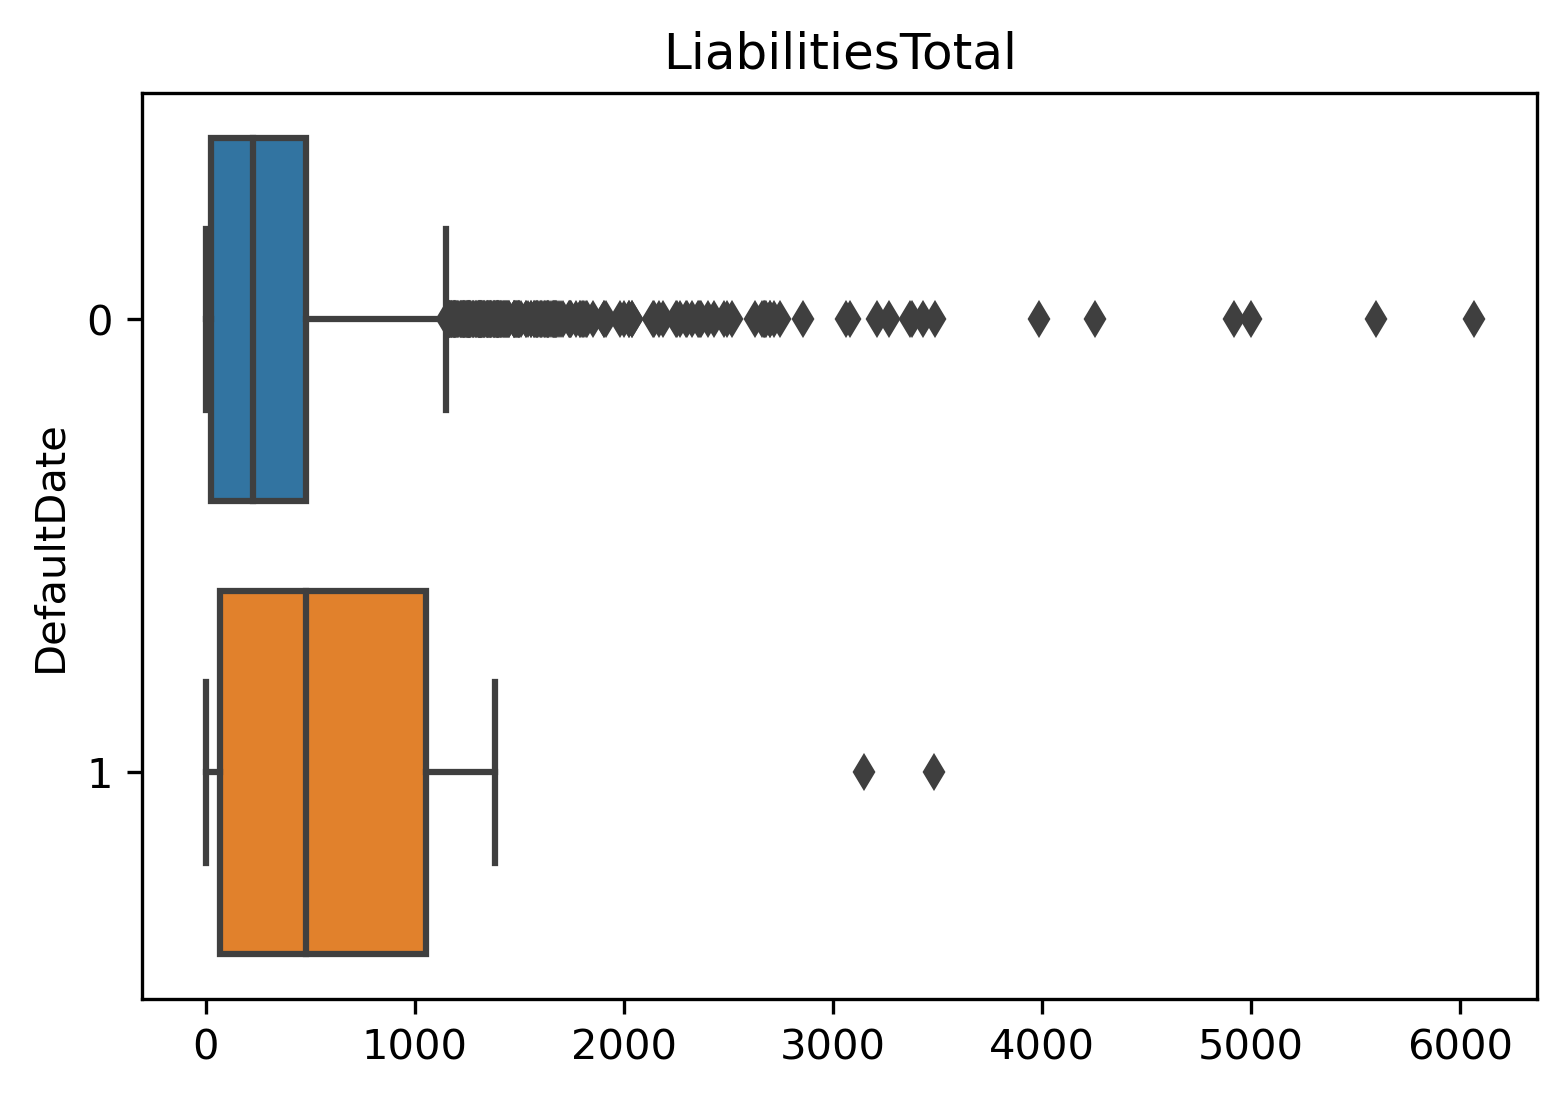

In [31]:
y_to_plot = to_plot['DefaultDate'].astype(str)
for col in b_vars:
    ax = plt.subplot()
    sns.boxplot(data = to_plot, x = col, y = y_to_plot,
                ax = ax, order = ['0', '1'])
    ax.set_title(f'{col}')
    ax.set_xlabel('')
    plt.show()

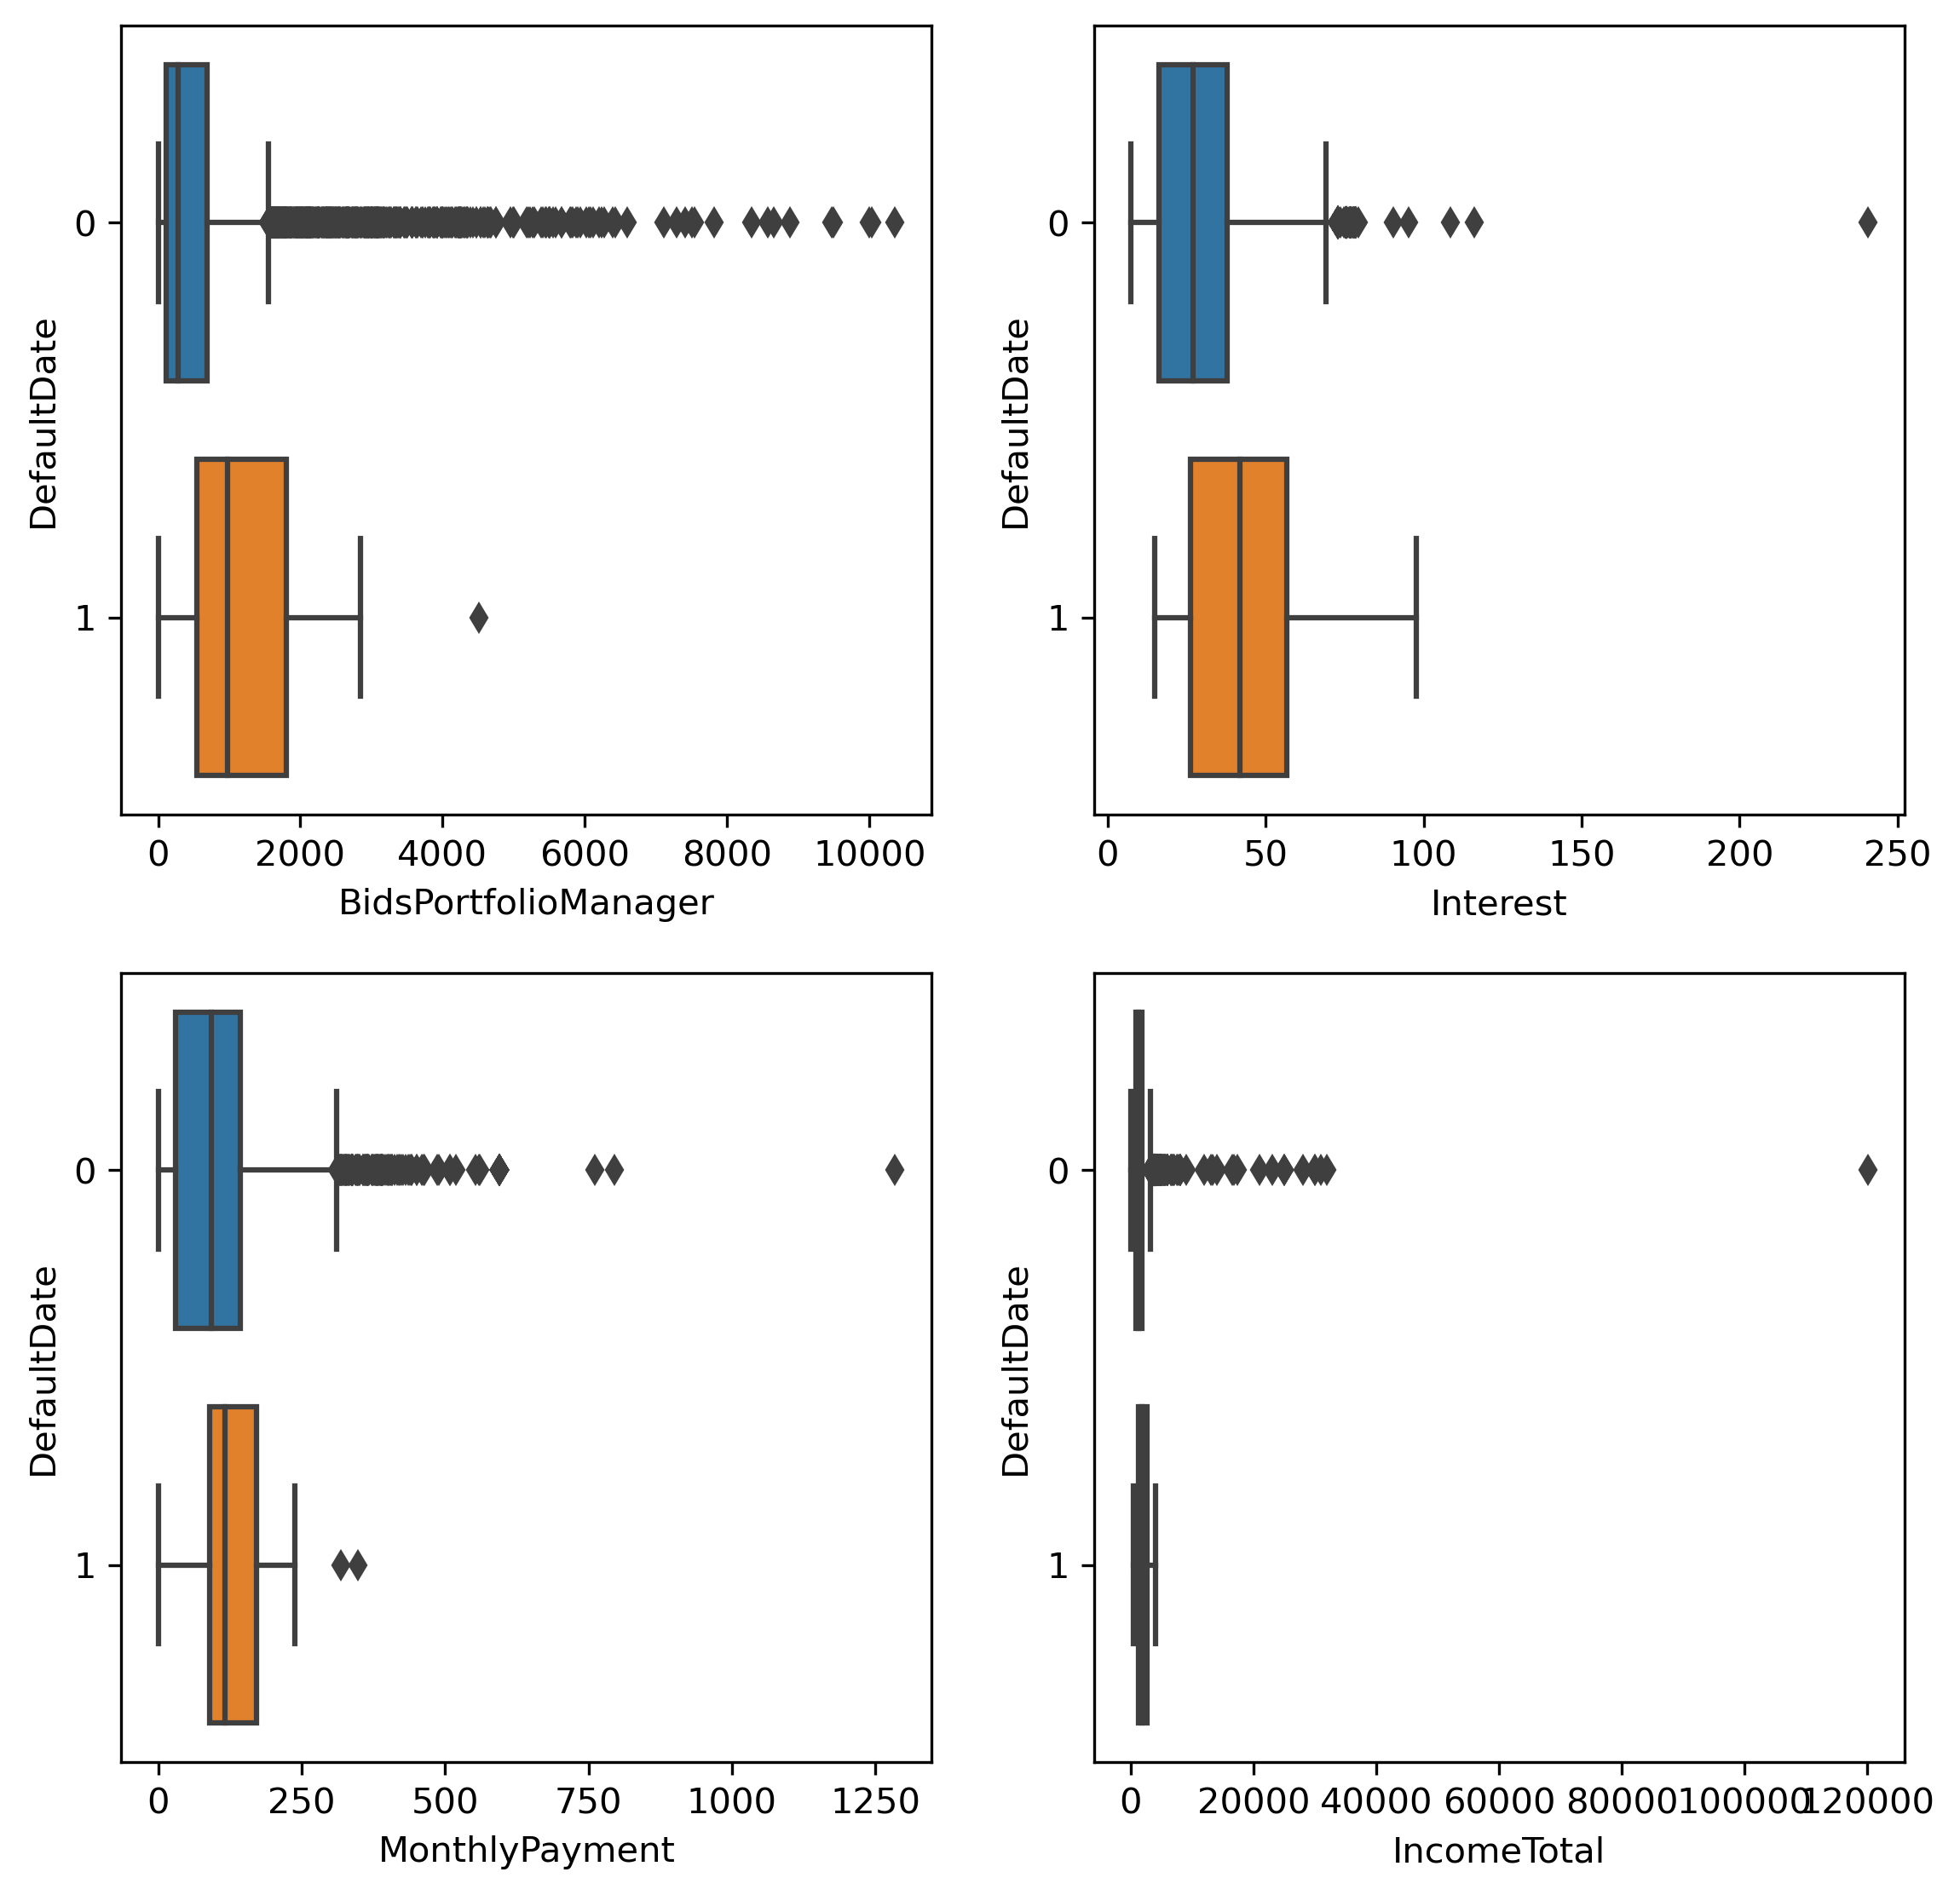

In [32]:
selected = ['BidsPortfolioManager', 'Interest','MonthlyPayment', 'IncomeTotal']
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (9, 9))
for var, ax in zip(selected, axes.ravel()):
    sns.boxplot(data = to_plot, x = var, y = y_to_plot,
                ax = ax, order = ['0', '1'])

In [33]:
# dropping outliers
df.drop(df[df['Age'] < 18].index, axis = 0, inplace = True)
df.drop(df[df['LiabilitiesTotal'] > 30000].index, axis = 0, inplace = True)

In [34]:
temp = df.copy()
numerical = temp.columns[df.dtypes != 'object']
num_vars = temp[numerical]
new_sample = num_vars.sample(frac = 0.1, random_state = 0)

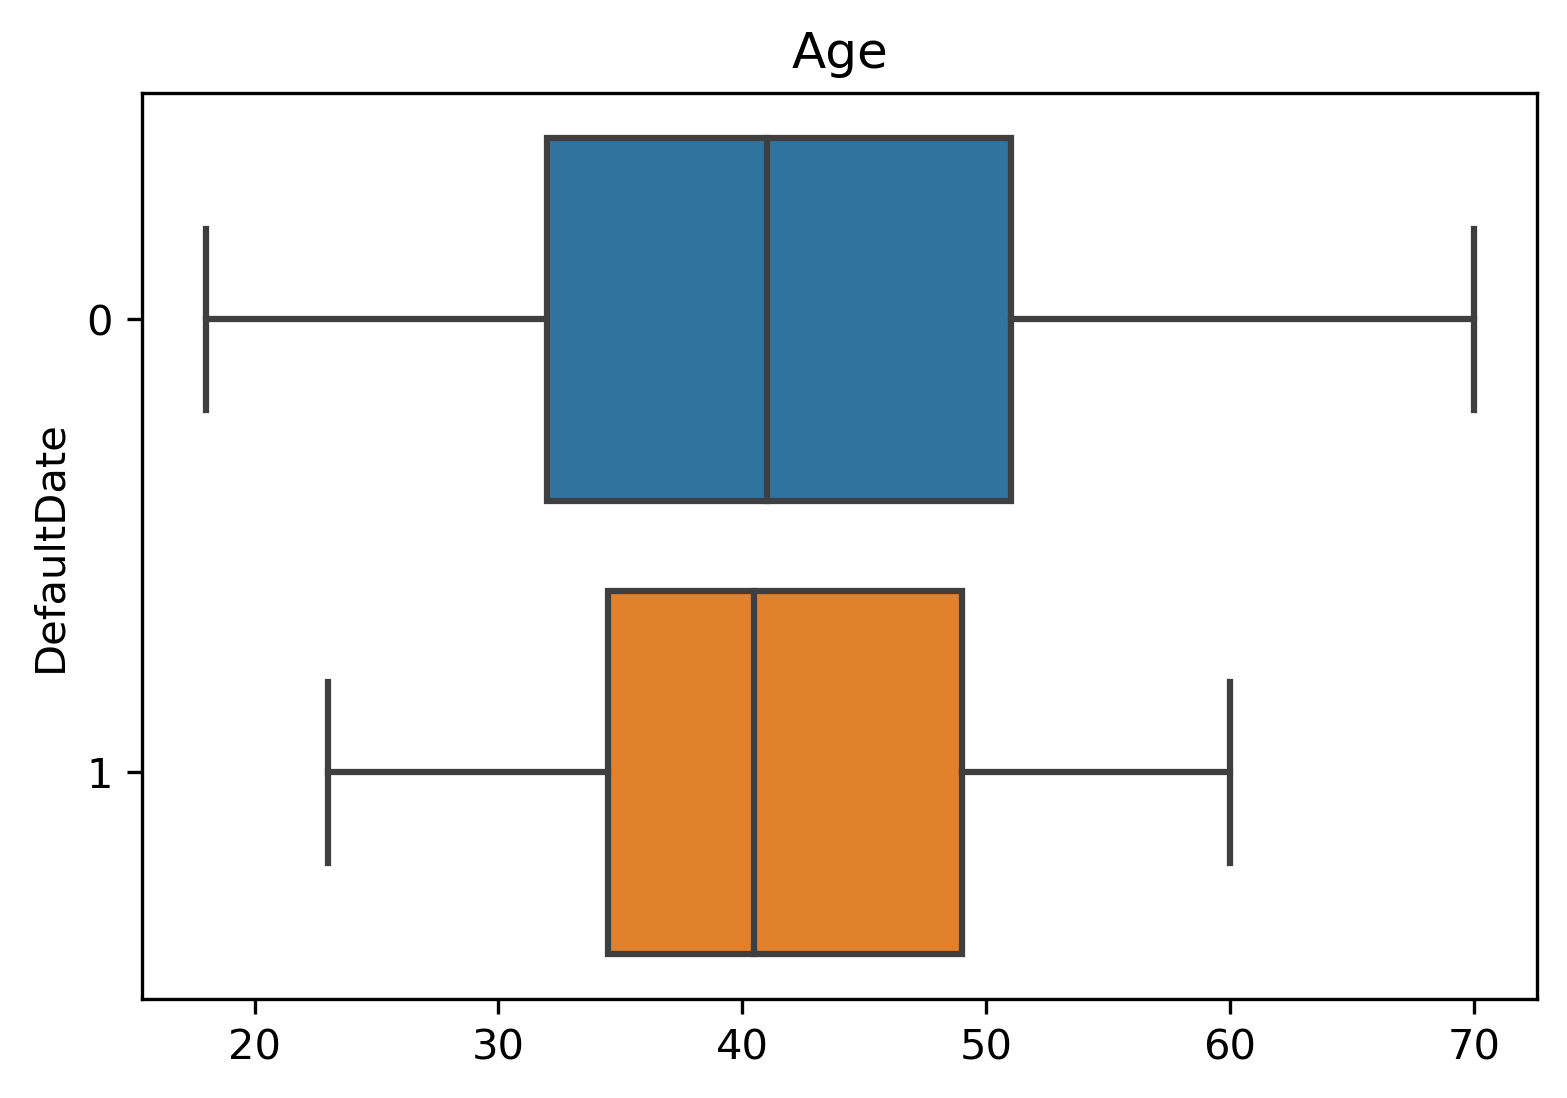

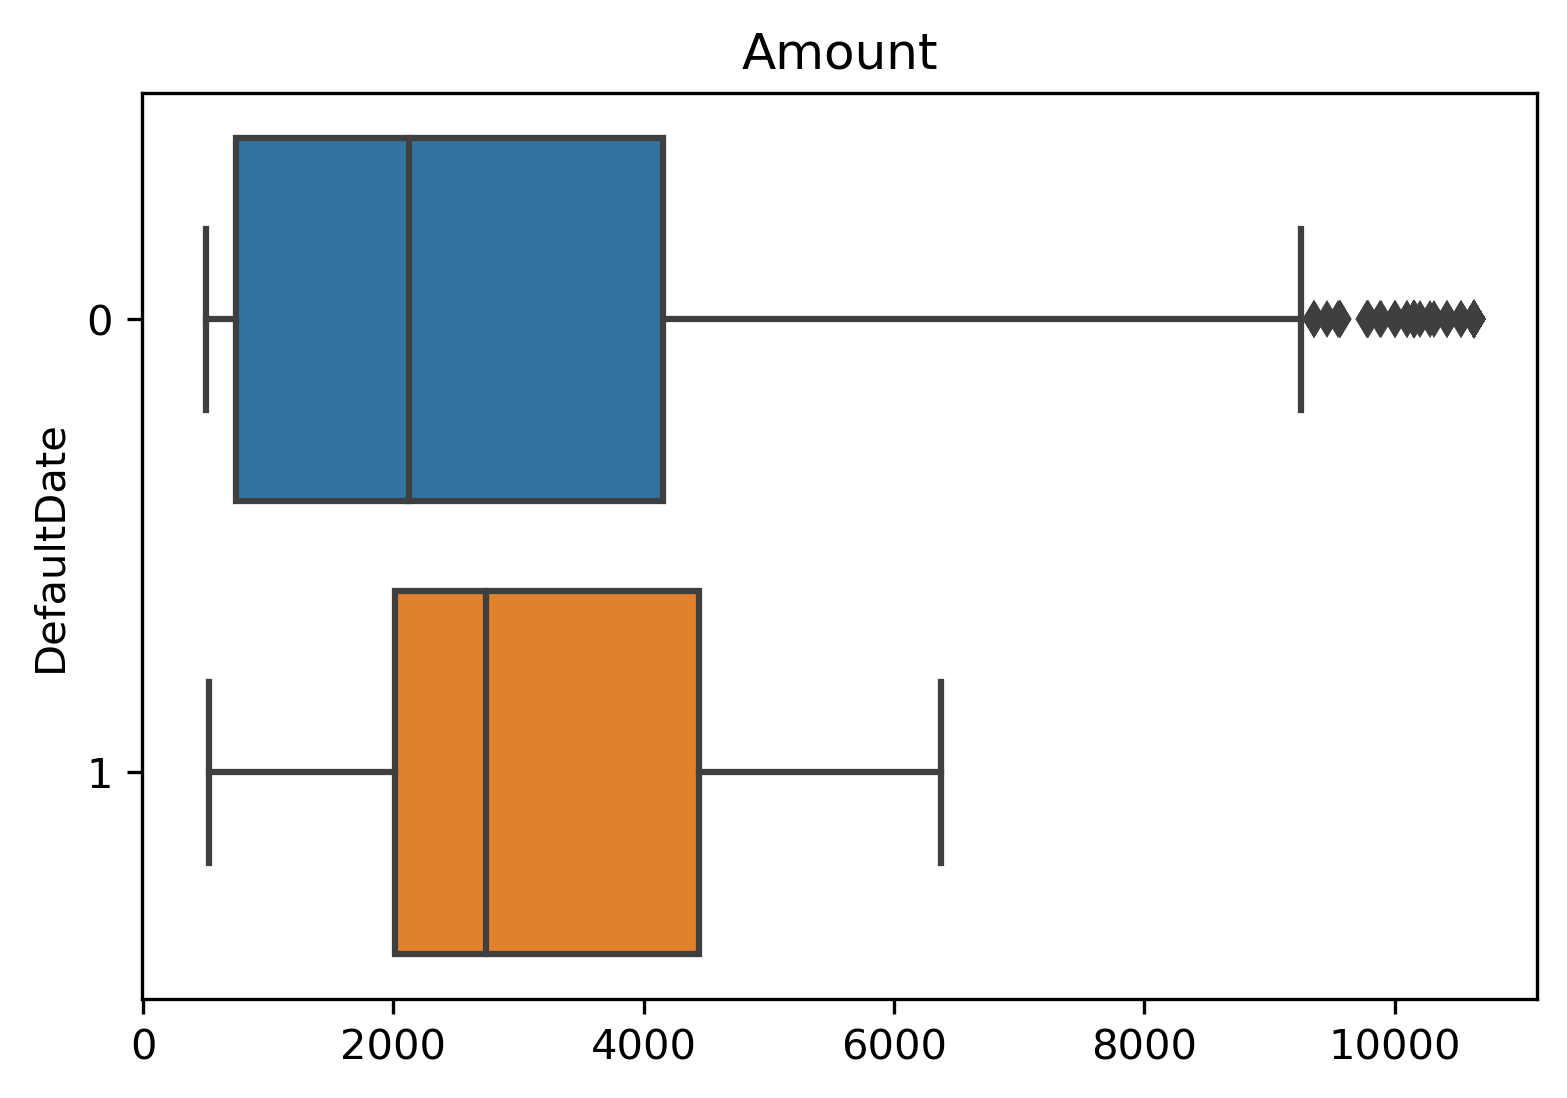

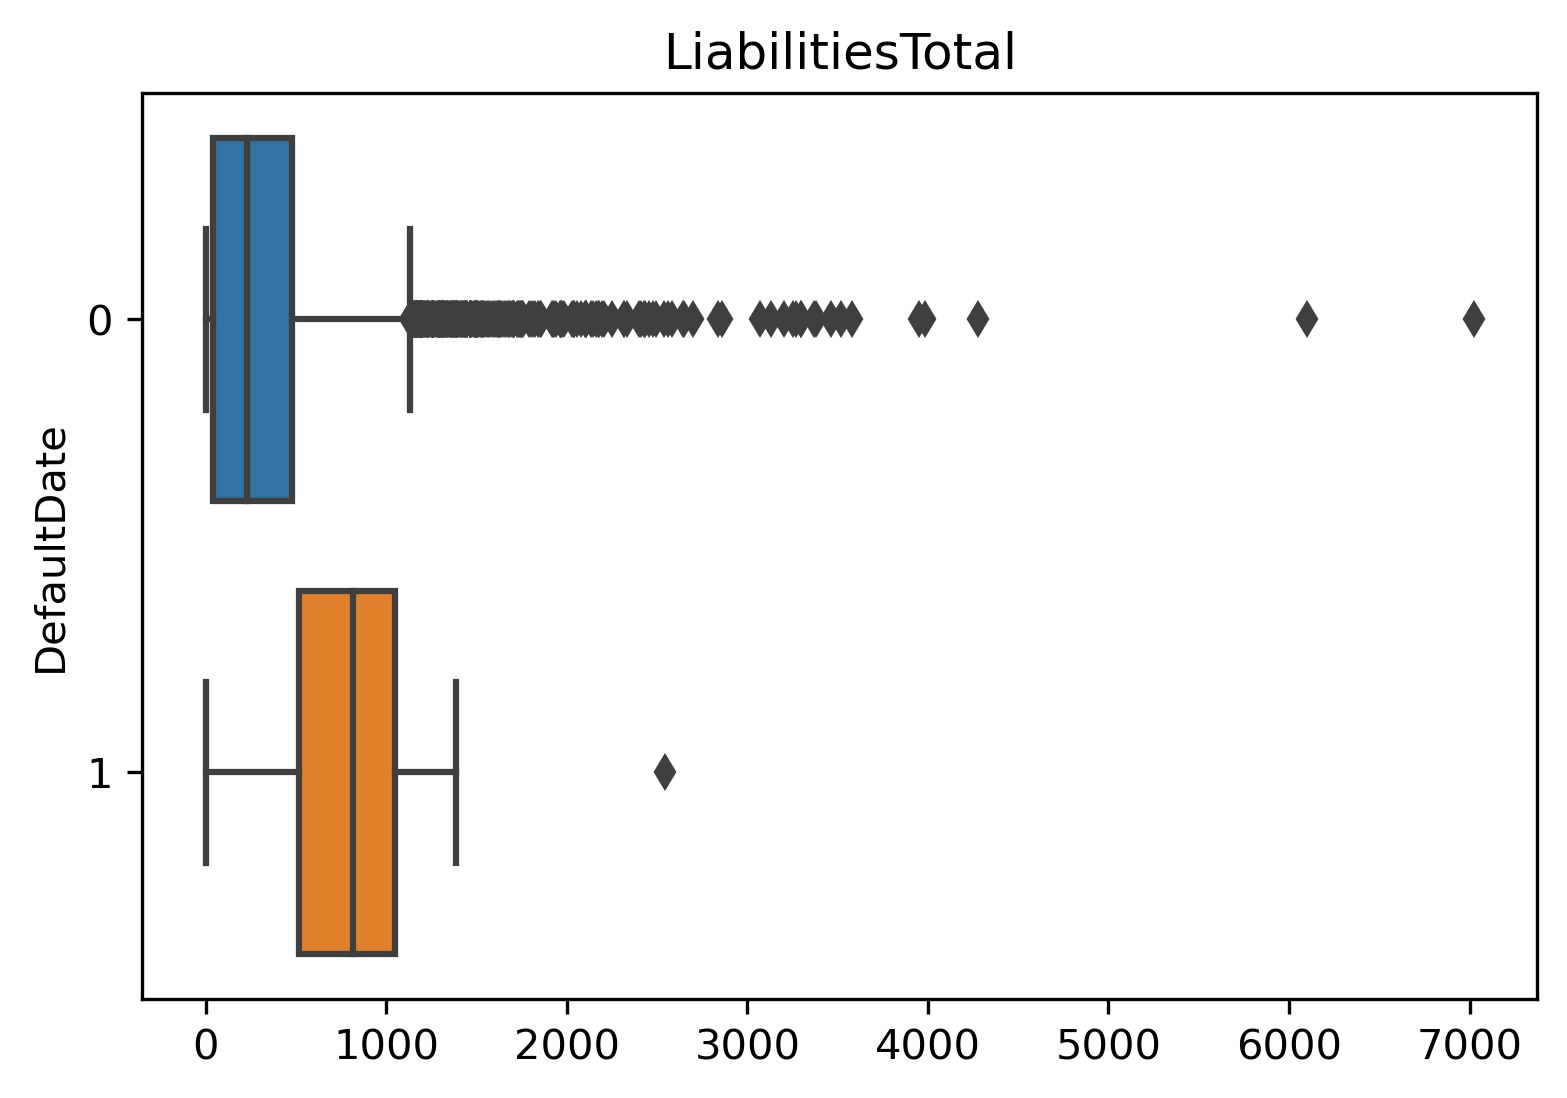

In [35]:
y_new = new_sample['DefaultDate'].astype(str)
for col in b_vars:
    ax = plt.subplot()
    sns.boxplot(data = new_sample, x = col, y = y_new, ax = ax)
    ax.set_title(f'{col}')
    ax.set_xlabel('')
    plt.show()

In [37]:
missing = df.isna().sum().apply(lambda x: x / df.shape[0])\
    .sort_values(ascending = False)
print(missing[missing > 0])
print(df[missing[missing > 0].index].dtypes)

MonthlyPayment    0.001015
dtype: float64
MonthlyPayment    float64
dtype: object


only FreeCash and DebtToIncome have a small amount of missing values

In [38]:
cat_vars = df.columns[df.dtypes == 'object']
dummied = pd.get_dummies(df, columns = cat_vars)

In [42]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [43]:
from sklearn.tree import DecisionTreeRegressor

In [44]:
# filling Numerical Variables with IterativeImputer (DebtToIncome, FreeCash)
imp = IterativeImputer(estimator = DecisionTreeRegressor(max_features = 'log2',max_depth = None, random_state = 0))
imp.fit(dummied)
new = pd.DataFrame(imp.transform(dummied), columns = dummied.columns)

In [45]:
# saving data
new.to_csv(path_or_buf = 'Bondoracleaned.csv', index = None)

# Feature Selection

In [46]:
X = pd.read_csv('Bondoracleaned.csv')

In [47]:
X.head()

,BidsPortfolioManager,BidsApi,BidsManual,Age,Amount,Interest,LoanDuration,MonthlyPayment,IncomeTotal,ExistingLiabilities,LiabilitiesTotal,RefinanceLiabilities,DebtToIncome,FreeCash,MonthlyPaymentDay,DefaultDate,AmountOfPreviousLoansBeforeLoan,PreviousEarlyRepaymentsCountBeforeLoan,NewCreditCustomer_No,NewCreditCustomer_Yes,VerificationType_Income and expenses verified,VerificationType_Income unverified,"VerificationType_Income unverified, cross-referenced by phone",VerificationType_Income verified,Gender_Female,Gender_Male,Gender_Undefined,Country_EE,Country_ES,Country_FI,Country_SK,UseOfLoan_Business,UseOfLoan_Education,UseOfLoan_Health,UseOfLoan_HomeImprovement,UseOfLoan_LoanConsolidation,UseOfLoan_Not_set,UseOfLoan_Other,UseOfLoan_RealEstate,UseOfLoan_Travel,UseOfLoan_Vehicle,Education_Basic,Education_Higher,Education_Not_present,Education_Primary,Education_Secondary,Education_Vocational,MaritalStatus_Cohabitant,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Not_specified,MaritalStatus_Single,MaritalStatus_Widow,EmploymentStatus_Entrepreneur,EmploymentStatus_FullyEmployed,EmploymentStatus_Not_defined,EmploymentStatus_PartiallyEmployed,EmploymentStatus_Retiree,EmploymentStatus_SelfEmployed,EmploymentDurationCurrentEmployer_MoreThan5Years,EmploymentDurationCurrentEmployer_Other,EmploymentDurationCurrentEmployer_Retiree,EmploymentDurationCurrentEmployer_TrialPeriod,EmploymentDurationCurrentEmployer_UpTo1Year,EmploymentDurationCurrentEmployer_UpTo2Years,EmploymentDurationCurrentEmployer_UpTo3Years,EmploymentDurationCurrentEmployer_UpTo4Years,EmploymentDurationCurrentEmployer_UpTo5Years,OccupationArea_Administrative,OccupationArea_Agriculture,OccupationArea_Art,OccupationArea_CivilService,OccupationArea_Construction,OccupationArea_Education,OccupationArea_Energy,OccupationArea_Finance,OccupationArea_Healthcare,OccupationArea_Hospitality,OccupationArea_Mining,OccupationArea_Not_mentioned,OccupationArea_Other,OccupationArea_Processing,OccupationArea_RealEstate,OccupationArea_Research,OccupationArea_Retail,OccupationArea_Telecom,OccupationArea_Transport,OccupationArea_Utilities,HomeOwnershipType_9.0,HomeOwnershipType_ Councilhouse,HomeOwnershipType_Joint ownership,HomeOwnershipType_Jointtenant,HomeOwnershipType_Livingwithparents,HomeOwnershipType_Mortgage,HomeOwnershipType_Not_specified,HomeOwnershipType_Other,HomeOwnershipType_Owner,"HomeOwnershipType_Tenant,pre-furnishedproperty","HomeOwnershipType_Tenant,unfurnishedproperty",Rating_A,Rating_AA,Rating_B,Rating_C,Rating_D,Rating_E,Rating_F,Rating_HR,Rating_Other,Restructured_No,Restructured_Yes,CreditScoreEsMicroL_M,CreditScoreEsMicroL_M1,CreditScoreEsMicroL_M10,CreditScoreEsMicroL_M2,CreditScoreEsMicroL_M3,CreditScoreEsMicroL_M4,CreditScoreEsMicroL_M5,CreditScoreEsMicroL_M6,CreditScoreEsMicroL_Other
0,1355.0,0.0,645.0,28.0,2000.0,24.46,60.0,63.90,2097.0,1.0,629.00,0.0,3.05,1404.10,15.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1000.0,0.0,0.0,27.0,1000.0,17.74,60.0,28.17,560.0,8.0,1327.37,2.0,47.56,43.67,6.0,0.0,1300.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,2345.0,0.0,655.0,29.0,3000.0,17.87,60.0,84.72,745.0,4.0,427.03,0.0,27.48,290.28,14.0,0.0,1000.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.

In [48]:
y = X['DefaultDate'].values.reshape(-1) # 0 is paid, 1 is default
X.drop(['DefaultDate'], axis = 1, inplace = True)

In [49]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state = 0)

In [51]:
rf = RandomForestClassifier(n_jobs = -1, random_state = 0)
rf.fit(X_train, y_train)

RandomForestClassifier(n_jobs=-1, random_state=0)

In [52]:
# Most important features based on RF
importances = {X.columns[i]:val \
               for i,val in enumerate(rf.feature_importances_)}
df_imp = pd.DataFrame.from_dict(importances, orient = 'index', columns = ['importance'])

In [53]:
sorted_features = df_imp['importance'].sort_values(ascending = False)
important_vars = sorted_features[sorted_features > 0.01]

In [54]:
idx = important_vars.index

[Text(0, 0, 'IncomeTotal'),
 Text(0, 1, 'BidsManual'),
 Text(0, 2, 'BidsPortfolioManager'),
 Text(0, 3, 'LiabilitiesTotal'),
 Text(0, 4, 'Age'),
 Text(0, 5, 'MonthlyPayment'),
 Text(0, 6, 'Interest'),
 Text(0, 7, 'Amount'),
 Text(0, 8, 'MonthlyPaymentDay'),
 Text(0, 9, 'ExistingLiabilities'),
 Text(0, 10, 'AmountOfPreviousLoansBeforeLoan'),
 Text(0, 11, 'BidsApi'),
 Text(0, 12, 'FreeCash'),
 Text(0, 13, 'DebtToIncome'),
 Text(0, 14, 'LoanDuration'),
 Text(0, 15, 'Education_Higher'),
 Text(0, 16, 'EmploymentDurationCurrentEmployer_UpTo5Years'),
 Text(0, 17, 'HomeOwnershipType_Owner'),
 Text(0, 18, 'EmploymentDurationCurrentEmployer_MoreThan5Years'),
 Text(0, 19, 'VerificationType_Income and expenses verified'),
 Text(0, 20, 'VerificationType_Income unverified'),
 Text(0, 21, 'Gender_Female'),
 Text(0, 22, 'HomeOwnershipType_Tenant,pre-furnishedproperty')]

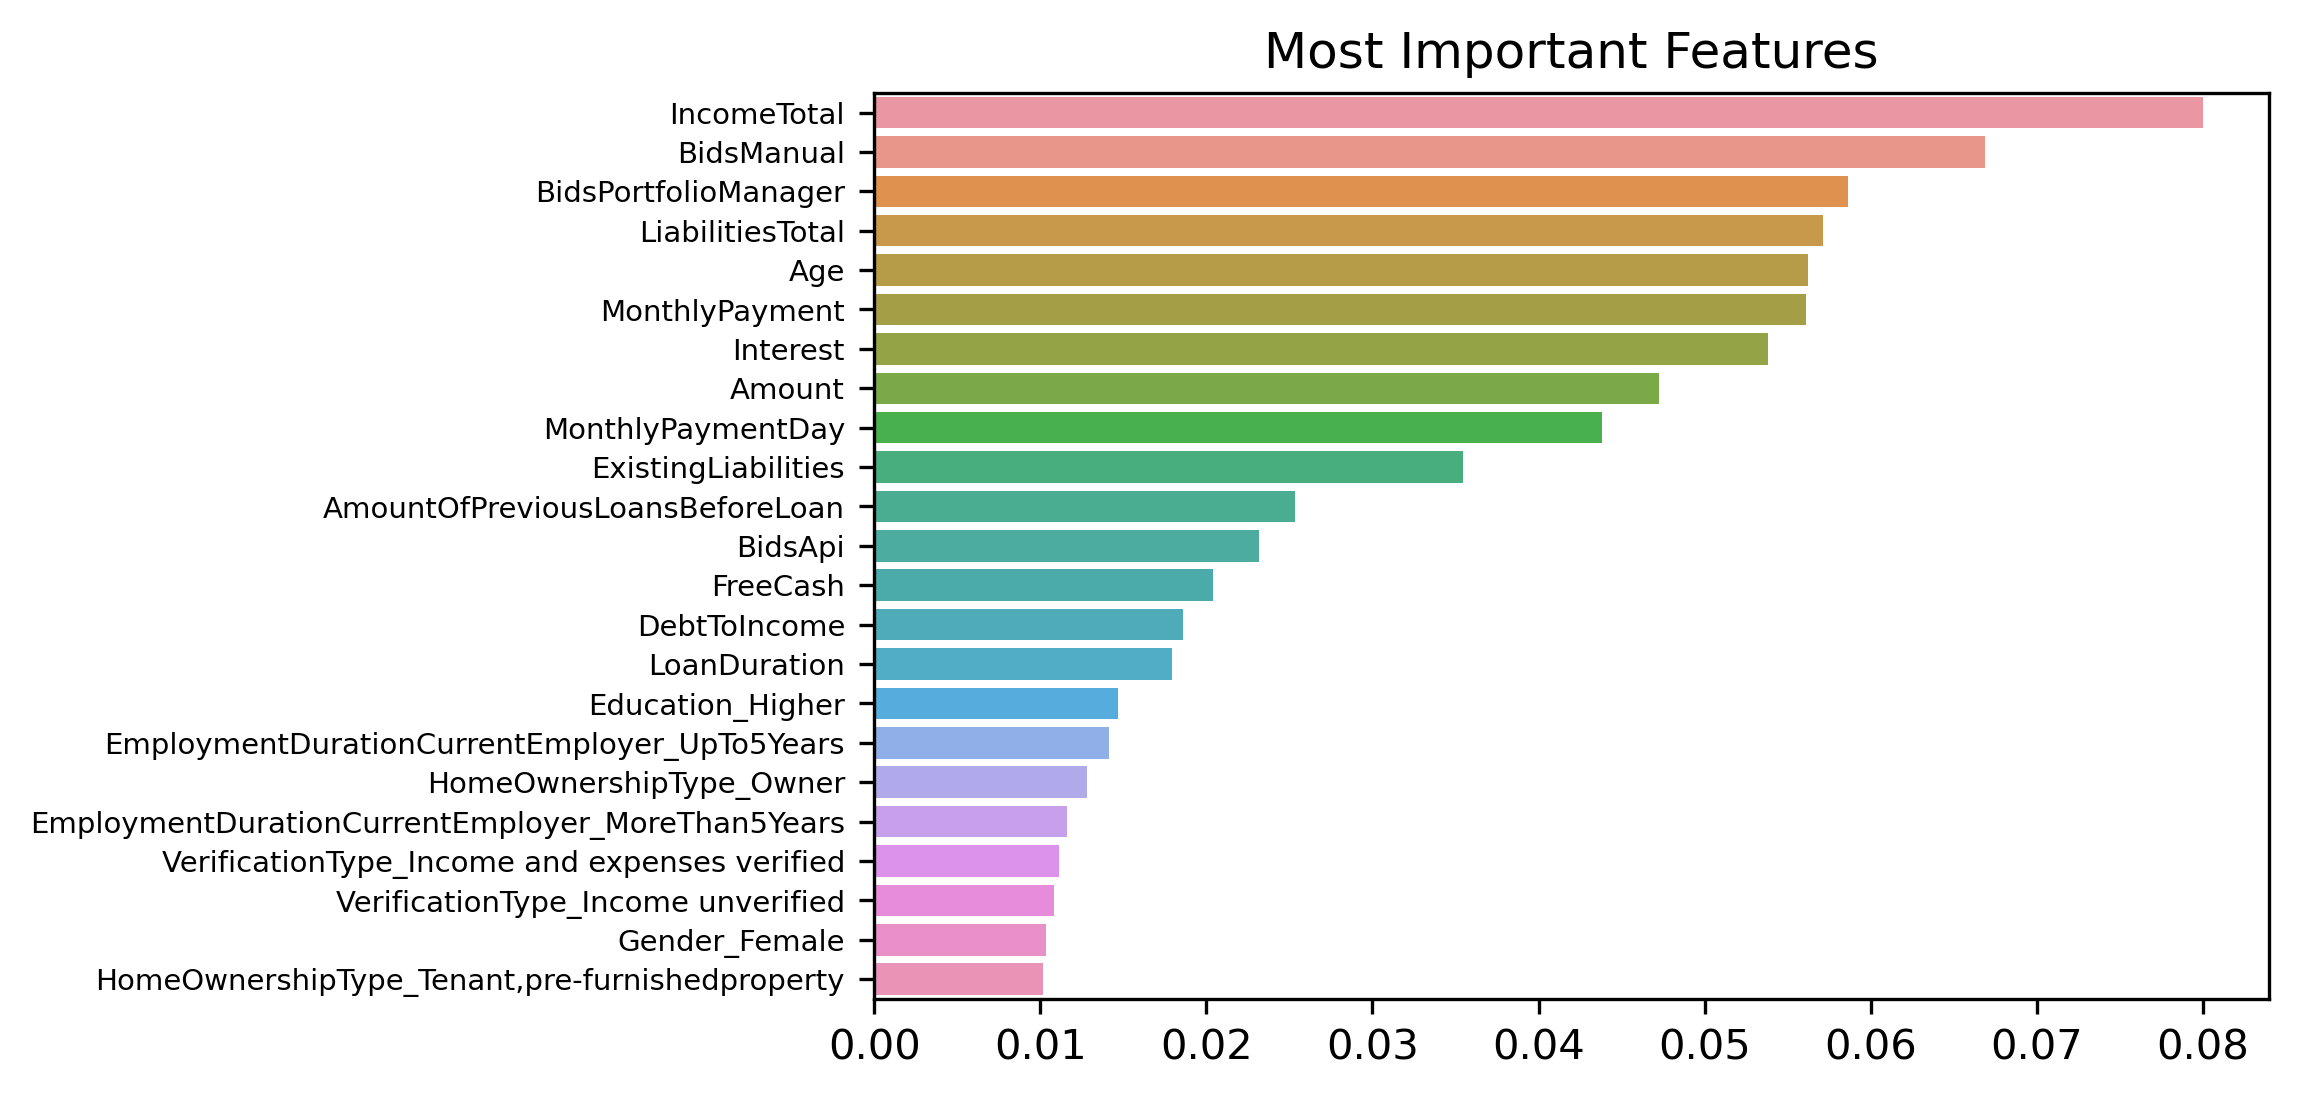

In [56]:
ax = plt.subplot()
sns.barplot(x = important_vars.values, y = idx, order = idx, ax = ax)
ax.set_title('Most Important Features')
ax.set_yticklabels(labels = idx, rotation = 0, fontsize = 7)

In [58]:
X_new = X[idx]
X_new.to_csv('Impfeatures_bondora.csv', index = None)

In [ ]:
pd.DataFrame(y, columns=['label']).to_csv('bondoraY.csv', index = None)